In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df1 = pd.read_excel("Final_NSE___Project_dataset (1).xlsx", sheet_name='Alcohol_Auto')
df1

,Category,Company,Industry,DATE,PRICE,OPEN,HIGH,LOW,VOLUME,CHANGE(%)
0,Alcohol,United Spirits Ltd,Breweries & Distilleries,2023-12-20,1059.95,1090.00,1095.00,1050.00,1312725,-0.0242
1,Alcohol,United Spirits Ltd,Breweries & Distilleries,2023-12-19,1086.25,1111.00,1112.95,1083.05,1062384,-0.0171
2,Alcohol,United Spirits Ltd,Breweries & Distilleries,2023-12-18,1105.15,1079.30,1115.75,1061.30,1780071,0.0202
3,Alcohol,United Spirits Ltd,Breweries & Distilleries,2023-12-15,1083.25,1092.00,1095.00,1078.05,1322021,-0.0014
4,Alcohol,United Spirits Ltd,Breweries & Distilleries,2023-12-14,1084.80,1083.85,1089.90,1076.55,2077791,0.0114
...,...,...,...,...,...,...,...,...,...,...
14801,Automobile & Ancillaries,JK Tyre & Ind,Auto Ancillaries - Tyres & Rubber Products,2019-01-07,104.00,103.50,106.35,103.45,573913,0.0063
14802,Automobile & Ancillaries,JK Tyre & Ind,Auto Ancillaries - Tyres & Rubber Products,2019-01-04,103.35,104.30,104.90,102.30,400666,-0.0053
14803,Automobile & Ancillaries,JK Tyre & Ind,Auto Ancillaries - Tyres & Rubber Products,2019-01-03,103.90,104.80,104.90,103.25,472830,-0.0048
14804,Automobile & Ancillaries,JK Tyre & Ind,Auto Ancillaries - Tyres & Rubber Products,2019-01-02,104.40,103.80,104.95,102.75,634144,0.0058


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14806 entries, 0 to 14805
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Category   14806 non-null  object        
 1   Company    14806 non-null  object        
 2   Industry   14806 non-null  object        
 3   DATE       14806 non-null  datetime64[ns]
 4   PRICE      14806 non-null  float64       
 5   OPEN       14806 non-null  float64       
 6   HIGH       14806 non-null  float64       
 7   LOW        14806 non-null  float64       
 8   VOLUME     14806 non-null  int64         
 9   CHANGE(%)  14806 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(3)
memory usage: 1.1+ MB


In [9]:
df1.isnull().sum()

Category     0
Company      0
Industry     0
DATE         0
PRICE        0
OPEN         0
HIGH         0
LOW          0
VOLUME       0
CHANGE(%)    0
dtype: int64

<Axes: >

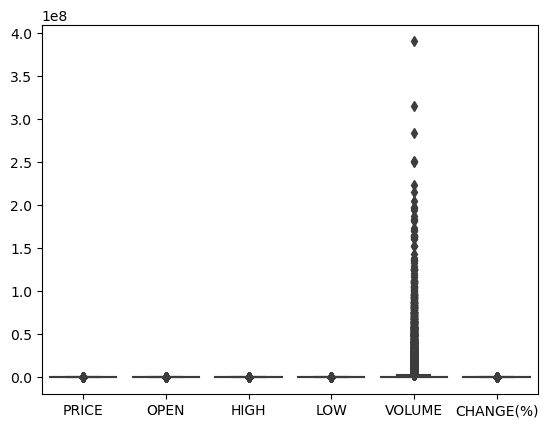

In [10]:
sns.boxplot(data=df1)

df1['DATE'] = pd.to_datetime(df1['DATE'])

# Correcting the incomplete line in the dataset
df1.at[14164, 'DATE'] = '2019-01-01'

def remove_outliers(d):
    Q1, Q3 = np.quantile(d, q=[0.25, 0.75])
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    d1 = np.where(d < lower, lower, d)
    d1 = np.where(d1 > upper, upper, d1)
    return d1

# Group by 'Company' and apply the remove_outliers function to numerical columns
numerical_columns = df1.select_dtypes(include=[np.number]).columns

df_outliers_removed = df1.groupby('Company')[numerical_columns].apply(lambda x: x.apply(remove_outliers))

# Plot boxplots after removing outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_outliers_removed)
plt.title('Boxplots of Numerical Columns After Removing Outliers by Company')
plt.show()

df1['DATE'] = pd.to_datetime(df1['DATE'])

df1.at[14164, 'DATE'] = '2019-01-01'

def remove_outliers(d):
    Q1, Q3 = np.quantile(d, q=[0.25, 0.75])
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    d1 = np.where(d < lower, lower, d)
    d1 = np.where(d1 > upper, upper, d1)
    return d1

# Apply the remove_outliers function to numerical columns of the DataFrame
numerical_columns = df1.select_dtypes(include=[np.number]).columns

df1[numerical_columns] = df1[numerical_columns].apply(remove_outliers)

# Plot boxplots after removing outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=df1[numerical_columns])
plt.show()

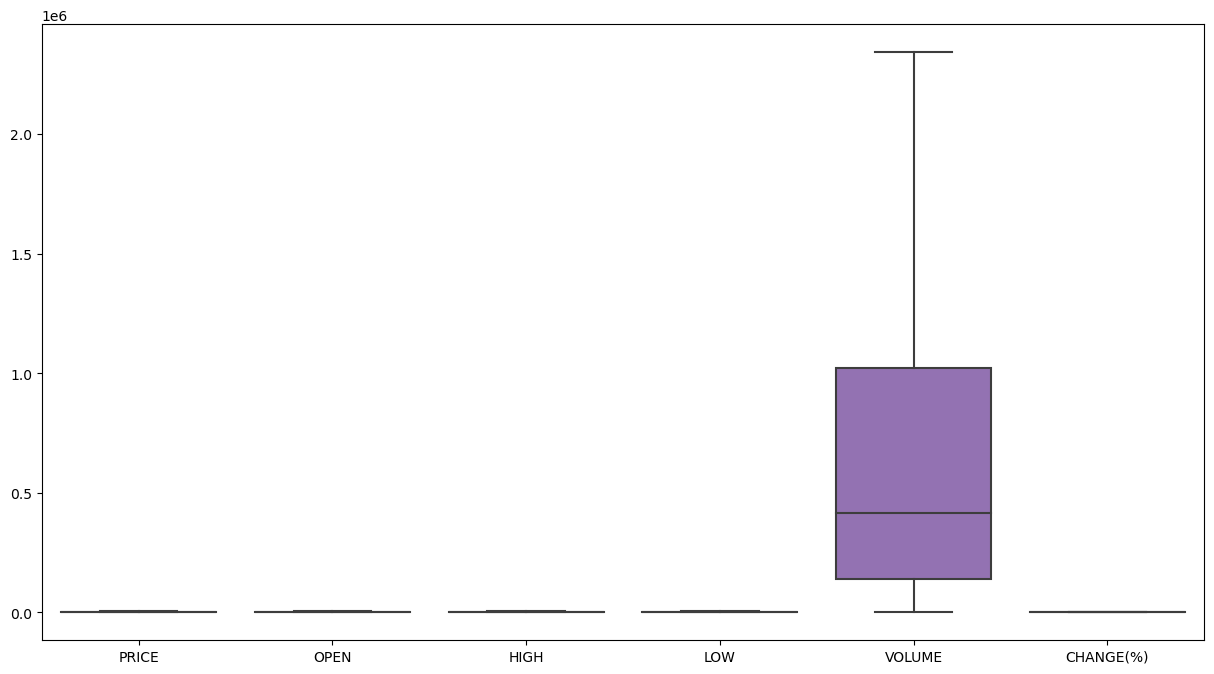

In [11]:

df1['DATE'] = pd.to_datetime(df1['DATE'])
df1.at[14164, 'DATE'] = '2019-01-01'

def remove_outliers(column):
    Q1, Q3 = column.quantile(q=[0.25, 0.75])
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return column.apply(lambda x: max(min(x, upper), lower))

# Apply the remove_outliers function to numerical columns of the DataFrame
numerical_columns = df1.select_dtypes(include=[np.number]).columns

df1[numerical_columns] = df1[numerical_columns].apply(remove_outliers)

# Plot boxplots after removing outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=df1[numerical_columns])
plt.show()


In [12]:
df1.isna().sum()

Category     0
Company      0
Industry     0
DATE         0
PRICE        0
OPEN         0
HIGH         0
LOW          0
VOLUME       0
CHANGE(%)    0
dtype: int64

In [13]:
df1.dropna(inplace=True)

In [14]:
df2=df1.copy()

df2 = df2.sort_values(by='DATE')

# Calculate daily returns for each stock
df2['Daily_Return'] = df2.groupby('Company')['PRICE'].pct_change()
df2

,Category,Company,Industry,DATE,PRICE,OPEN,HIGH,LOW,VOLUME,CHANGE(%),Daily_Return
14805,Automobile & Ancillaries,JK Tyre & Ind,Auto Ancillaries - Tyres & Rubber Products,2019-01-01,103.80,103.95,104.50,102.15,371151.0,0.0010,NaN
1232,Alcohol,United Spirits Ltd,Breweries & Distilleries,2019-01-01,621.00,634.00,634.00,619.00,1292037.0,-0.0233,NaN
6172,Alcohol,Globus Spirits Ltd,Breweries & Distilleries,2019-01-01,162.60,166.80,166.80,162.00,62738.0,-0.0240,NaN
7407,Alcohol,Som Distilleries & Breweries Ltd,Breweries & Distilleries,2019-01-01,77.25,76.81,78.14,76.52,15547.0,-0.0048,NaN
3702,Alcohol,Radico Khaitan Ltd,Breweries & Distilleries,2019-01-01,402.50,402.00,406.00,392.60,332521.0,0.0051,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1233,Alcohol,United Breweries Ltd,Breweries & Distilleries,2023-12-22,1684.60,1708.95,1726.00,1674.10,354584.0,-0.0108,-0.010804
2468,Alcohol,Radico Khaitan Ltd,Breweries & Distilleries,2023-12-22,1602.50,1595.60,1618.95,1578.05,337713.0,0.0135,0.013471
4938,Alcohol,Globus Spirits Ltd,Breweries & Distilleries,2023-12-22,852.90,860.10,863.75,847.10,77558.0,-0.0013,-0.001347
3703,Alcohol,Tilaknagar Industries Ltd,Breweries & Distilleries,2023-12-22,237.90,241.05,243.45,236.60,581856.0,-0.0042,-0.004186


In [15]:

df2 = df2.sort_values(by=['Company', 'DATE'])

# Calculate additional features
df2['MA_10'] = df2.groupby('Company')['PRICE'].transform(lambda x: x.rolling(window=10).mean())
df2['MA_50'] = df2.groupby('Company')['PRICE'].transform(lambda x: x.rolling(window=30).mean())
df2.head(20)


,Category,Company,Industry,DATE,PRICE,OPEN,HIGH,LOW,VOLUME,CHANGE(%),Daily_Return,MA_10,MA_50
11106,Automobile & Ancillaries,Bajaj Auto Ltd,Automobile - 2 & 3 Wheelers,2019-01-01,2726.65,2735.00,2743.40,2705.00,304150.0,0.0024,NaN,NaN,NaN
11105,Automobile & Ancillaries,Bajaj Auto Ltd,Automobile - 2 & 3 Wheelers,2019-01-02,2692.00,2720.00,2747.25,2677.00,599274.0,-0.0127,-0.012708,NaN,NaN
11104,Automobile & Ancillaries,Bajaj Auto Ltd,Automobile - 2 & 3 Wheelers,2019-01-03,2701.35,2690.10,2723.85,2682.10,310511.0,0.0035,0.003473,NaN,NaN
11103,Automobile & Ancillaries,Bajaj Auto Ltd,Automobile - 2 & 3 Wheelers,2019-01-04,2734.20,2714.00,2742.00,2702.10,362393.0,0.0122,0.012161,NaN,NaN
11102,Automobile & Ancillaries,Bajaj Auto Ltd,Automobile - 2 & 3 Wheelers,2019-01-07,2658.55,2739.90,2740.00,2645.00,462215.0,-0.0277,-0.027668,NaN,NaN
11101,Automobile & Ancillaries,Bajaj Auto Ltd,Automobile - 2 & 3 Wheelers,2019-01-08,2694.85,2667.00,2700.00,2635.50,486654.0,0.0137,0.013654,NaN,NaN
11100,Automobile & Ancillaries,Bajaj Auto Ltd,Automobile - 2 & 3 Wheelers,2019-01-09,2696.90,2702.50,2710.00,2672.50,285560.0,0.0008,0.000761,NaN,NaN
11099,Automobile & Ancillaries,Bajaj Auto Ltd,Automobile - 2 & 3 Wheelers,2019-01-10,2725.30,2700.00,2729.00,2680.00,277585.0,0.0105,0.010531,NaN,NaN
11098,Automobile & Ancillaries,Bajaj Auto Ltd,Automobile - 2 & 3 Wheelers,2019-01-11,2720.95,2728.00,2738.70,2700.85,259834.0,-0.0016,-0.001596,NaN,NaN
11097,Automobile & Ancillaries,Bajaj Auto Ltd,Automobile - 2 & 3 Wheelers,2019-01-14,2699.15,2718.00,2747.20,2676.45,170937.0,-0.0080,-0.008012,2704.990,NaN


In [16]:
df2.tail(10)

,Category,Company,Industry,DATE,PRICE,OPEN,HIGH,LOW,VOLUME,CHANGE(%),Daily_Return,MA_10,MA_50
67,Alcohol,United Spirits Ltd,Breweries & Distilleries,2023-12-09,1037.70,1065.10,1069.10,1030.25,1238905.0,-0.0276,0.116827,945.010,981.711667
47,Alcohol,United Spirits Ltd,Breweries & Distilleries,2023-12-10,1053.25,1052.95,1062.30,1045.10,911102.0,0.0028,0.014985,946.085,983.128333
26,Alcohol,United Spirits Ltd,Breweries & Distilleries,2023-12-11,1051.90,1062.00,1066.75,1046.40,567327.0,0.0072,-0.001282,947.160,984.126667
6,Alcohol,United Spirits Ltd,Breweries & Distilleries,2023-12-12,1050.00,1052.00,1056.90,1043.20,697698.0,0.0023,-0.001806,947.105,984.866667
5,Alcohol,United Spirits Ltd,Breweries & Distilleries,2023-12-13,1072.60,1056.00,1074.40,1048.25,1473906.0,0.0215,0.021524,949.480,986.213333
4,Alcohol,United Spirits Ltd,Breweries & Distilleries,2023-12-14,1084.80,1083.85,1089.90,1076.55,2077791.0,0.0114,0.011374,972.185,993.423333
3,Alcohol,United Spirits Ltd,Breweries & Distilleries,2023-12-15,1083.25,1092.00,1095.00,1078.05,1322021.0,-0.0014,-0.001429,1003.895,1004.573333
2,Alcohol,United Spirits Ltd,Breweries & Distilleries,2023-12-18,1105.15,1079.30,1115.75,1061.30,1780071.0,0.0202,0.020217,1034.855,1014.883333
1,Alcohol,United Spirits Ltd,Breweries & Distilleries,2023-12-19,1086.25,1111.00,1112.95,1083.05,1062384.0,-0.0171,-0.017102,1055.405,1020.246667
0,Alcohol,United Spirits Ltd,Breweries & Distilleries,2023-12-20,1059.95,1090.00,1095.00,1050.00,1312725.0,-0.0242,-0.024212,1068.485,1022.658333


In [17]:
# Calculate volatility (using a rolling standard deviation for the last 10 days)
df2['Volatility'] = df2.groupby('Company')['Daily_Return'].transform(lambda x: x.rolling(window=10).std())
df2

,Category,Company,Industry,DATE,PRICE,OPEN,HIGH,LOW,VOLUME,CHANGE(%),Daily_Return,MA_10,MA_50,Volatility
11106,Automobile & Ancillaries,Bajaj Auto Ltd,Automobile - 2 & 3 Wheelers,2019-01-01,2726.65,2735.00,2743.40,2705.00,304150.0,0.0024,NaN,NaN,NaN,NaN
11105,Automobile & Ancillaries,Bajaj Auto Ltd,Automobile - 2 & 3 Wheelers,2019-01-02,2692.00,2720.00,2747.25,2677.00,599274.0,-0.0127,-0.012708,NaN,NaN,NaN
11104,Automobile & Ancillaries,Bajaj Auto Ltd,Automobile - 2 & 3 Wheelers,2019-01-03,2701.35,2690.10,2723.85,2682.10,310511.0,0.0035,0.003473,NaN,NaN,NaN
11103,Automobile & Ancillaries,Bajaj Auto Ltd,Automobile - 2 & 3 Wheelers,2019-01-04,2734.20,2714.00,2742.00,2702.10,362393.0,0.0122,0.012161,NaN,NaN,NaN
11102,Automobile & Ancillaries,Bajaj Auto Ltd,Automobile - 2 & 3 Wheelers,2019-01-07,2658.55,2739.90,2740.00,2645.00,462215.0,-0.0277,-0.027668,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,Alcohol,United Spirits Ltd,Breweries & Distilleries,2023-12-14,1084.80,1083.85,1089.90,1076.55,2077791.0,0.0114,0.011374,972.185,993.423333,0.062647
3,Alcohol,United Spirits Ltd,Breweries & Distilleries,2023-12-15,1083.25,1092.00,1095.00,1078.05,1322021.0,-0.0014,-0.001429,1003.895,1004.573333,0.044008
2,Alcohol,United Spirits Ltd,Breweries & Distilleries,2023-12-18,1105.15,1079.30,1115.75,1061.30,1780071.0,0.0202,0.020217,1034.855,1014.883333,0.044276
1,Alcohol,United Spirits Ltd,Breweries & Distilleries,2023-12-19,1086.25,1111.00,1112.95,1083.05,1062384.0,-0.0171,-0.017102,1055.405,1020.246667,0.038629


In [18]:
summary_stats = df2.groupby(['Company']).describe()
summary_stats
# Display the summary statistics

PRICE                             \
                                   count         mean           std   
Company                                                               
Bajaj Auto Ltd                    1233.0  3424.995367  4.877048e+02   
Eicher Motors Ltd                 1233.0  2591.770555  6.315689e+02   
Globus Spirits Ltd                1235.0   612.098340  4.556678e+02   
Gulf Oil Lubric                   1233.0   621.511517  1.592620e+02   
JK Tyre & Ind                     1233.0   128.793958  6.837500e+01   
Maruti Suzuki India Ltd           1233.0  3963.581250  9.189624e-11   
Radico Khaitan Ltd                1235.0   739.810688  3.700132e+02   
Som Distilleries & Breweries Ltd  1235.0    90.780105  8.585265e+01   
Tata Motors Ltd                   1233.0   325.113423  1.726579e+02   
Tilaknagar Industries Ltd         1235.0    64.882146  6.182843e+01   
United Breweries Ltd              1235.0  1382.384372  2.239378e+02   
United Spirits Ltd                1233.0   720.206407  1.646034e+02   

                                                                      \
                                         min         25%         50%   
Company                                                                
Bajaj Auto Ltd                    1935.55000  3001.70000  3589.05000   
Eicher Motors Ltd                 1268.01000  2093.70000  2561.15000   
Globus Spirits Ltd                  64.30000   140.00000   645.85000   
Gulf Oil Lubric                    384.25000   458.55000   611.65000   
JK Tyre & Ind                       34.40000    74.90000   117.90000   
Maruti Suzuki India Ltd           3963.58125  3963.58125  3963.58125   
Radico Khaitan Ltd                 243.55000   386.85000   760.80000   
Som Distilleries & Breweries Ltd    22.65000    38.47500    58.08000   
Tata Motors Ltd                     65.30000   167.90000   316.90000   
Tilaknagar Industries Ltd           11.85000    16.77500    40.10000   
United Breweries Ltd               802.50000  1249.42500  1415.15000   
United Spirits Ltd                 448.10000   578.05000   662.15000   

                                                            OPEN               \
                                         75%         max   count         mean   
Company                                                                         
Bajaj Auto Ltd                    3880.30000  3963.58125  1233.0  3428.426602   
Eicher Motors Ltd                 3146.70000  3963.58125  1233.0  2594.030973   
Globus Spirits Ltd                 921.15000  1719.50000  1235.0   614.486194   
Gulf Oil Lubric                    749.20000   905.85000  1233.0   623.193593   
JK Tyre & Ind                      155.35000   389.65000  1233.0   129.003366   
Maruti Suzuki India Ltd           3963.58125  3963.58125  1233.0  3970.500000   
Radico Khaitan Ltd                1072.02500  1720.85000  1235.0   740.277085   
Som Distilleries & Breweries Ltd   105.85000   381.40000  1235.0    91.105085   
Tata Motors Ltd                    448.05000   732.40000  1233.0   325.626642   
Tilaknagar Industries Ltd           93.30000   280.40000  1235.0    65.130648   
United Breweries Ltd              1566.27500  1783.55000  1235.0  1383.641781   
United Spirits Ltd                 862.85000  1105.15000  1233.0   721.253812   

                                  ...        MA_50              Volatility  \
                                  ...          75%          max      count   
Company                           ...                                        
Bajaj Auto Ltd                    ...  3832.029896  3963.581250     1223.0   
Eicher Motors Ltd                 ...  3143.020417  3851.863125     1223.0   
Globus Spirits Ltd                ...   976.016250  1377.478333     1225.0   
Gulf Oil Lubric                   ...   739.845417   883.438333     1223.0   
JK Tyre & Ind                     ...   152.757083   351.760000     1223.0   
Maruti Suzuki India Ltd           ...  3963.5812

Text(0.5, 1.0, 'Distribution of Daily Returns')

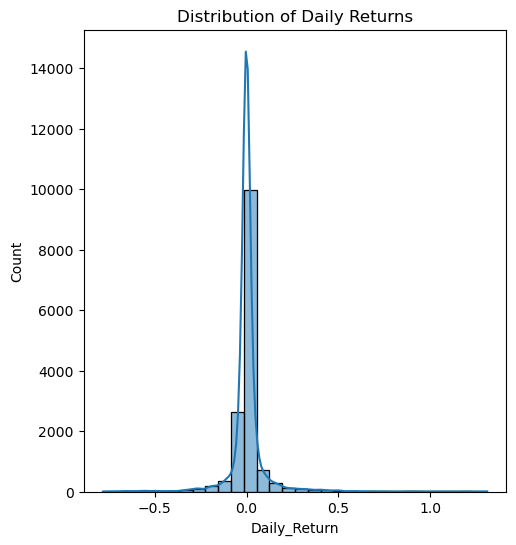

In [19]:
df2 = df2.sort_values(by=['Company', 'DATE'])

# Plot histograms for returns and trading volumes
plt.figure(figsize=(12, 6))

# Histogram for Daily Returns
plt.subplot(1, 2, 1)
sns.histplot(df2['Daily_Return'], bins=30, kde=True)
plt.title('Distribution of Daily Returns')

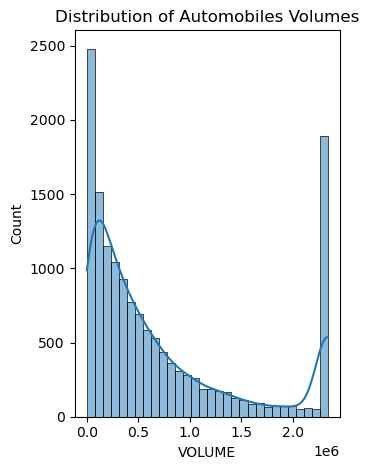

In [20]:
# Histogram for Trading Volumes
plt.subplot(1, 2, 2)
sns.histplot(df2['VOLUME'], bins=30, kde=True)
plt.title('Distribution of Automobiles Volumes')

plt.tight_layout()
plt.show()

In [21]:
correlation_matrix = df2.groupby('Company')[['Daily_Return', 'VOLUME']].corr()
correlation_matrix

Daily_Return    VOLUME
Company                                                              
Bajaj Auto Ltd                   Daily_Return      1.000000  0.163273
                                 VOLUME            0.163273  1.000000
Eicher Motors Ltd                Daily_Return      1.000000  0.100393
                                 VOLUME            0.100393  1.000000
Globus Spirits Ltd               Daily_Return      1.000000  0.065922
                                 VOLUME            0.065922  1.000000
Gulf Oil Lubric                  Daily_Return      1.000000  0.222592
                                 VOLUME            0.222592  1.000000
JK Tyre & Ind                    Daily_Return      1.000000  0.278799
                                 VOLUME            0.278799  1.000000
Maruti Suzuki India Ltd          Daily_Return           NaN       NaN
                                 VOLUME                 NaN  1.000000
Radico Khaitan Ltd               Daily_Return      1.000000  0.024656
                                 VOLUME            0.024656  1.000000
Som Distilleries & Breweries Ltd Daily_Return      1.000000  0.148719
                                 VOLUME            0.148719  1.000000
Tata Motors Ltd                  Daily_Return      1.000000 -0.002130
                                 VOLUME           -0.002130  1.000000
Tilaknagar Industries Ltd        Daily_Return      1.000000  0.232008
                                 VOLUME            0.232008  1.000000
United Breweries Ltd             Daily_Return      1.000000  0.051206
                                 VOLUME            0.051206  1.000000
United Spirits Ltd               Daily_Return      1.000000  0.058711
                                 VOLUME            0.058711  1.000000

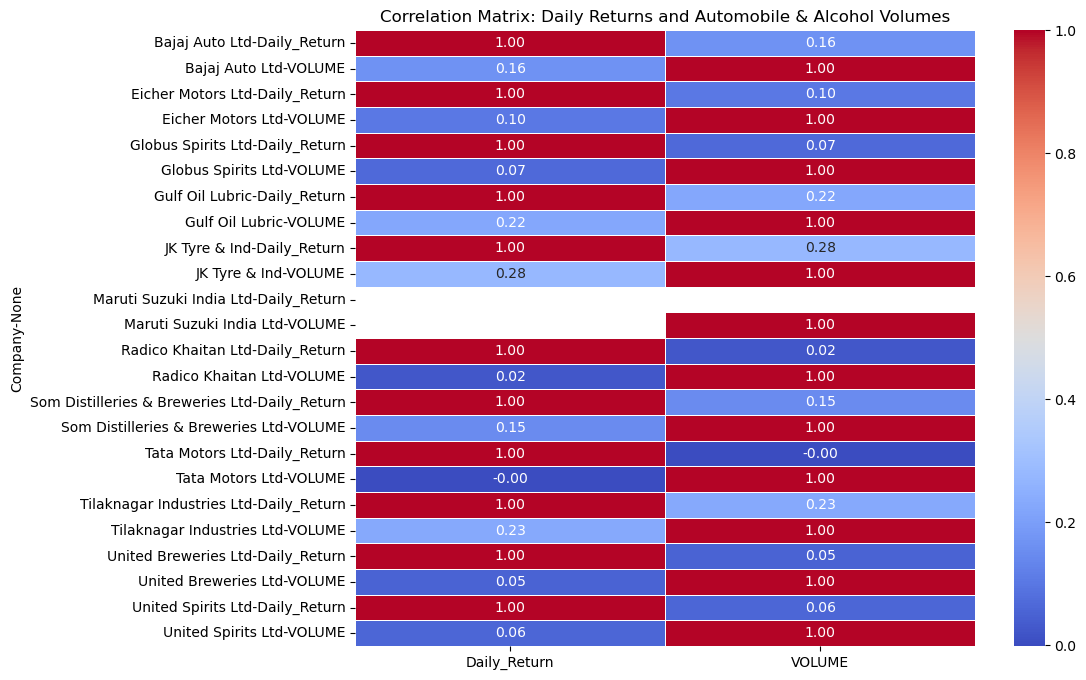

In [22]:
# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix: Daily Returns and Automobile & Alcohol Volumes')
plt.show()

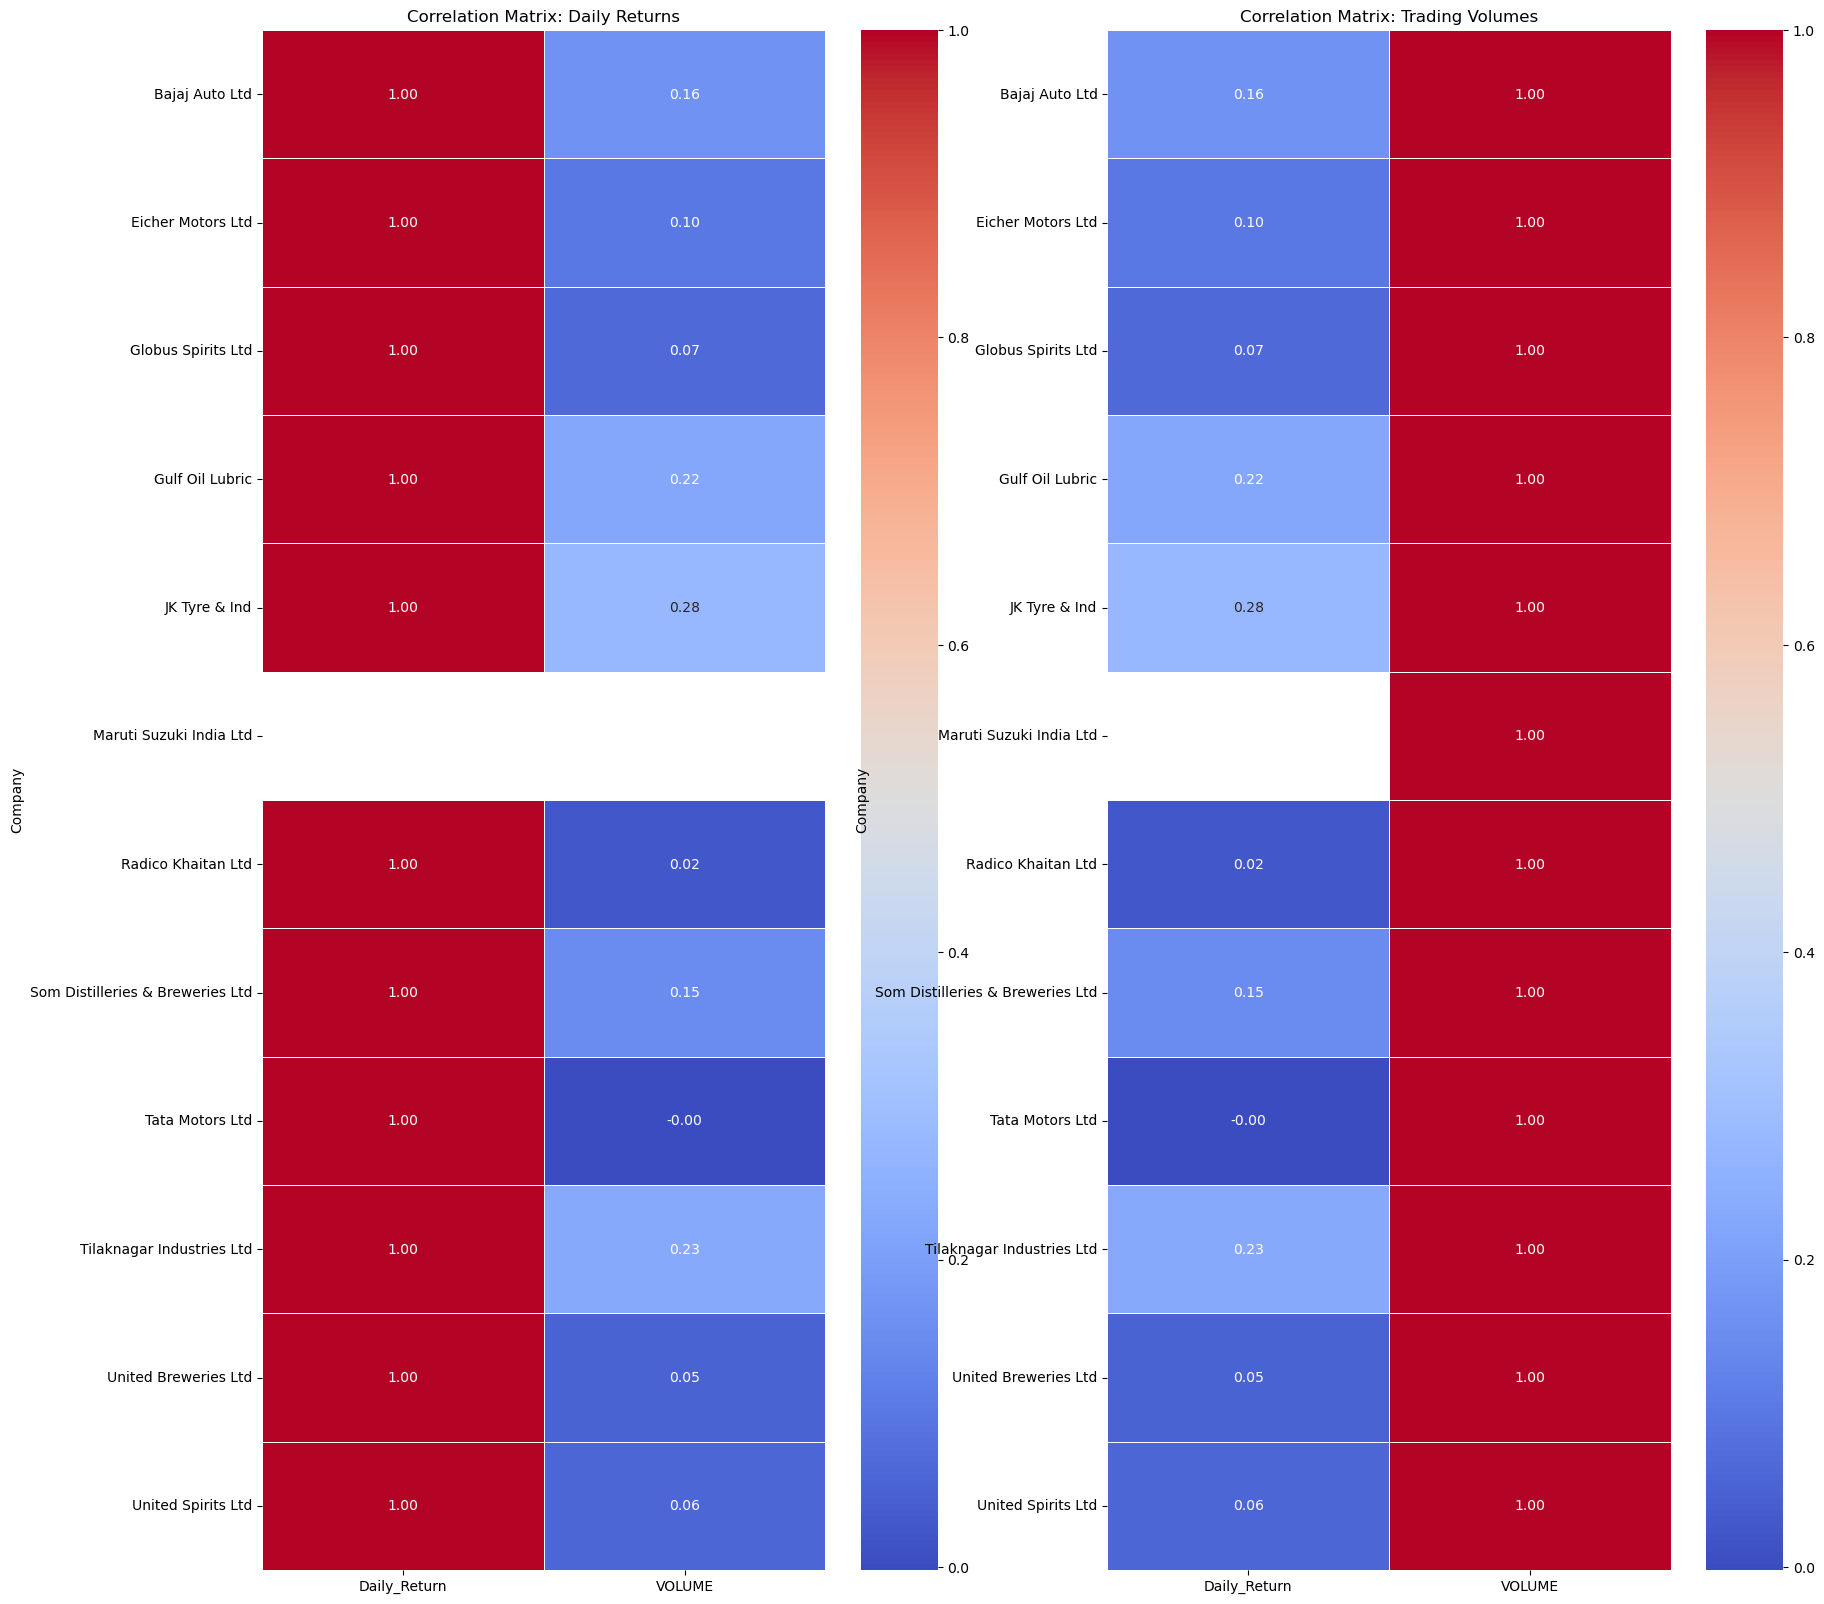

In [23]:

df2['DATE'] = pd.to_datetime(df2['DATE'])

# Sort the DataFrame by 'DATE' in ascending order
df2 = df2.sort_values(by=['Company', 'DATE'])

# Calculate the correlation matrix
correlation_matrix = df2.groupby(['Company'])[['Daily_Return', 'VOLUME']].corr().unstack()

# Visualize the correlation matrices
plt.figure(figsize=(20, 20))

# Correlation matrix for Daily Returns
plt.subplot(1, 2, 1)
sns.heatmap(correlation_matrix['Daily_Return'], annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix: Daily Returns')

# Correlation matrix for Trading Volumes
plt.subplot(1, 2, 2)
sns.heatmap(correlation_matrix['VOLUME'], annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix: Trading Volumes')

#plt.tight_layout()
plt.show()


In [24]:
grouped_df = df2.groupby('Company')
grouped_df['Daily_Return'].describe()

,count,mean,std,min,25%,50%,75%,max
Company,,,,,,,,
Bajaj Auto Ltd,1232.0,0.000425,0.015552,-0.136801,-0.005310,0.000000,0.005975,0.121106
Eicher Motors Ltd,1232.0,0.000643,0.020927,-0.125816,-0.010371,0.000182,0.011293,0.133801
Globus Spirits Ltd,1234.0,0.022613,0.213220,-0.782182,-0.031141,-0.001284,0.034980,1.310084
Gulf Oil Lubric,1232.0,0.000013,0.019488,-0.095394,-0.009182,-0.000337,0.008508,0.194067
JK Tyre & Ind,1232.0,0.001594,0.034455,-0.339867,-0.014498,-0.001305,0.013476,0.523603
Maruti Suzuki India Ltd,1232.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Radico Khaitan Ltd,1234.0,0.007516,0.109719,-0.548805,-0.020076,0.002454,0.034163,0.564396
Som Distilleries & Breweries Ltd,1234.0,0.019134,0.192561,-0.733509,-0.032681,0.000000,0.041827,1.302666
Tata Motors Ltd,1232.0,0.001588,0.030152,-0.175827,-0.012602,0.000740,0.014393,0.204467


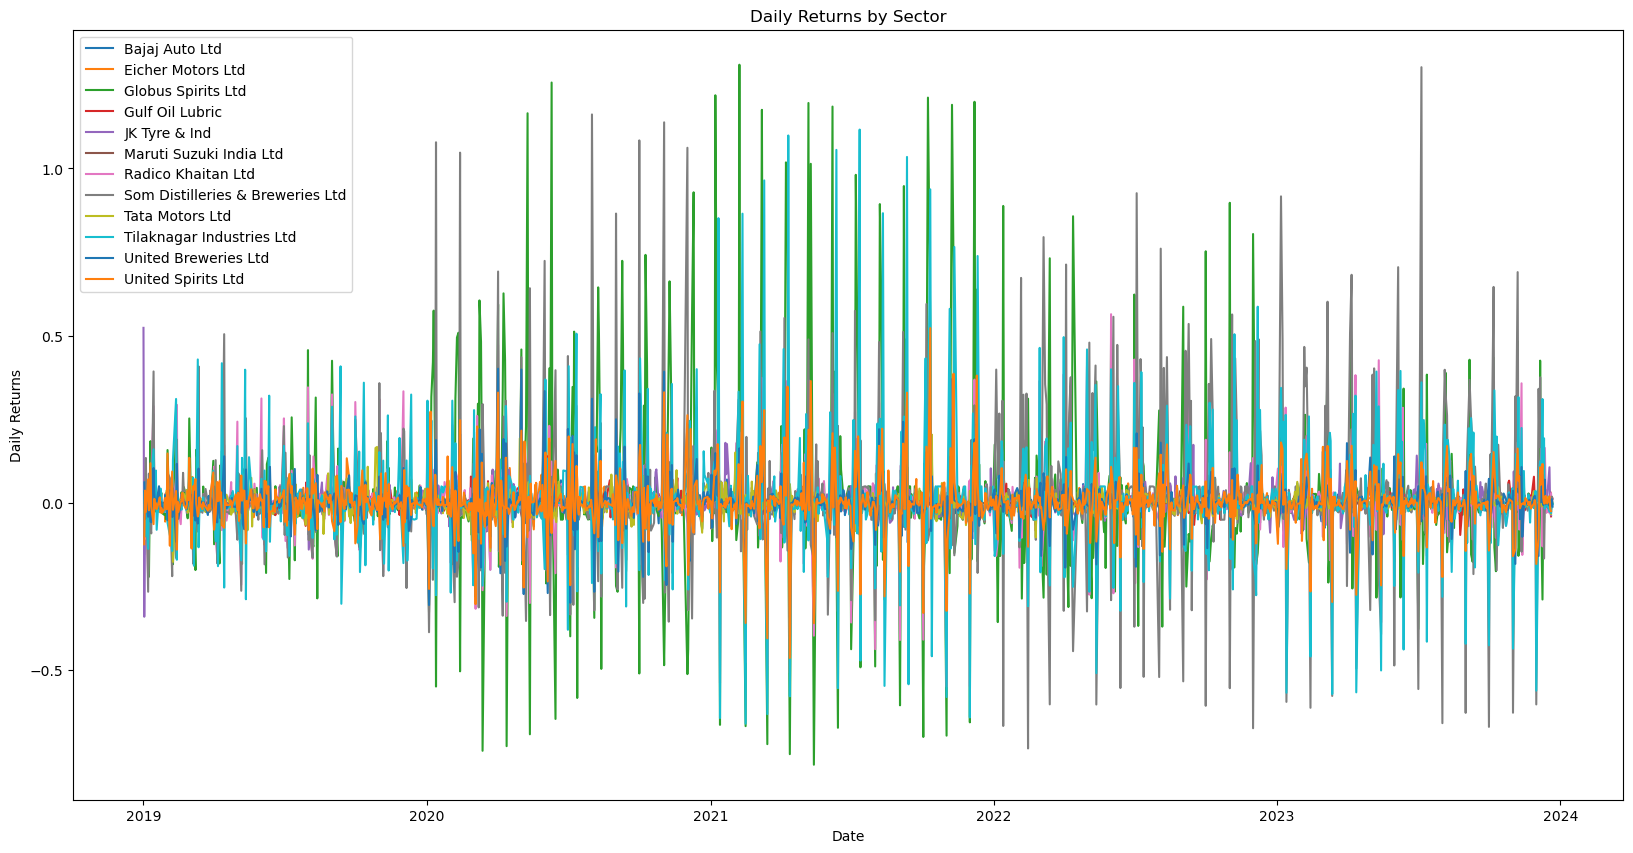

In [25]:
# Example: Line chart
plt.figure(figsize=(20, 10))
for name, group in grouped_df:
    plt.plot(group['DATE'], group['Daily_Return'], label=name)

plt.title('Daily Returns by Sector')
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.legend()
plt.show()


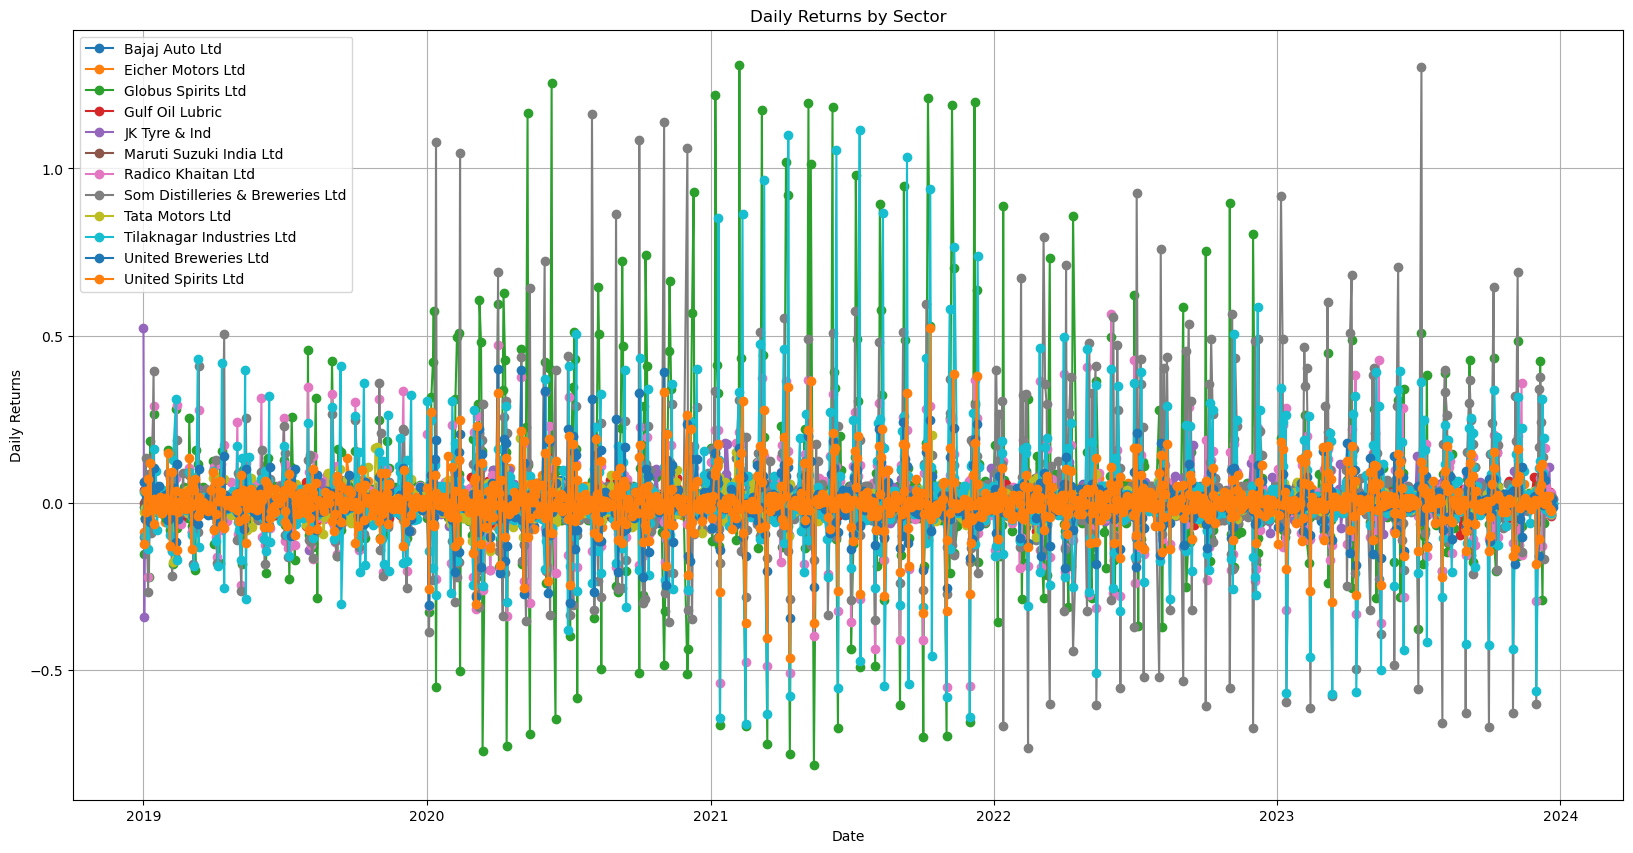

In [26]:


plt.figure(figsize=(20, 10))

for name, group in grouped_df:
    plt.plot(group['DATE'], group['Daily_Return'], label=name, marker='o', linestyle='-')

plt.title('Daily Returns by Sector')
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.legend()
plt.grid(True)
plt.show()


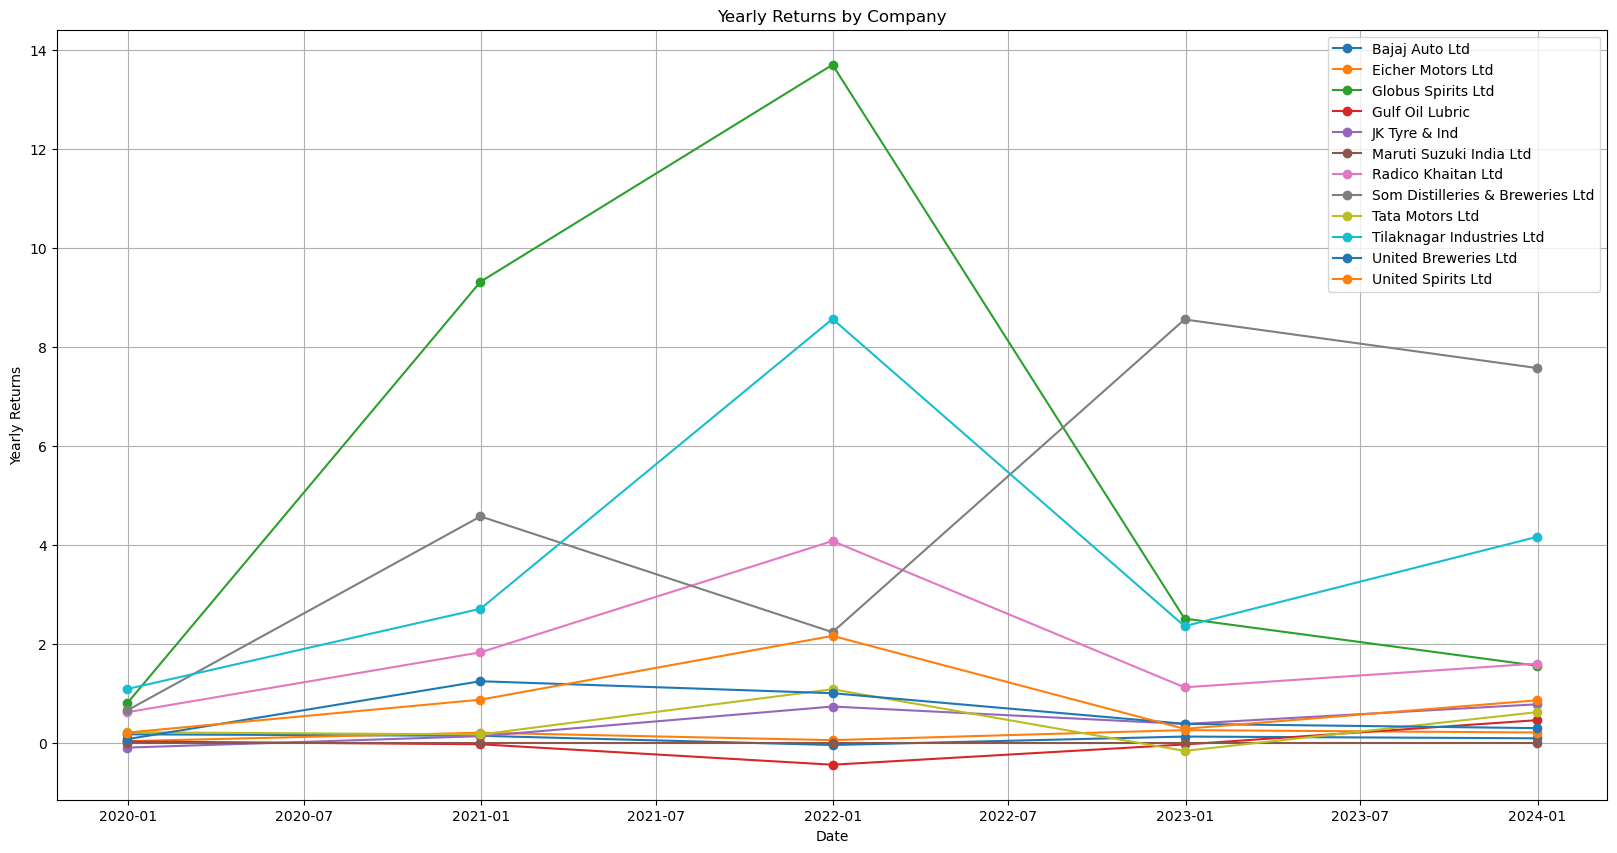

In [27]:

df2['DATE'] = pd.to_datetime(df2['DATE'])

# Calculate yearly returns
df2_yearly = df2.set_index('DATE').groupby(['Company', pd.Grouper(freq='Y')])['Daily_Return'].sum().reset_index()

# Plotting
plt.figure(figsize=(20, 10))

for name, group in df2_yearly.groupby('Company'):
    plt.plot(group['DATE'], group['Daily_Return'], label=name, marker='o', linestyle='-')

plt.title('Yearly Returns by Company')
plt.xlabel('Date')
plt.ylabel('Yearly Returns')
plt.legend()
plt.grid(True)
plt.show()


D:\Anaconda\New folder\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
D:\Anaconda\New folder\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


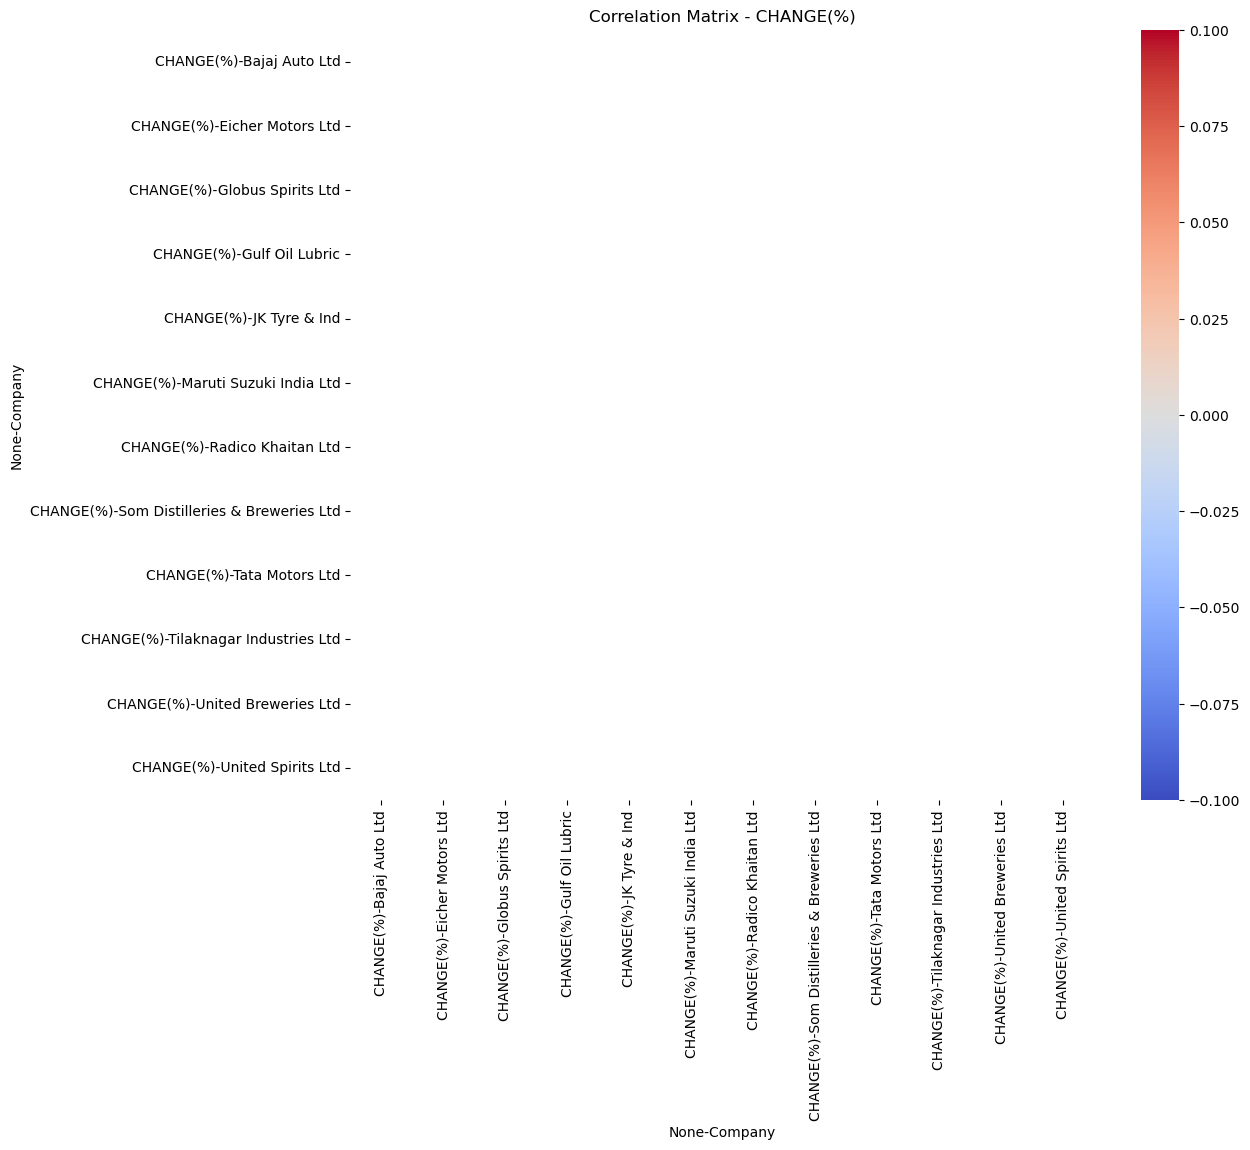

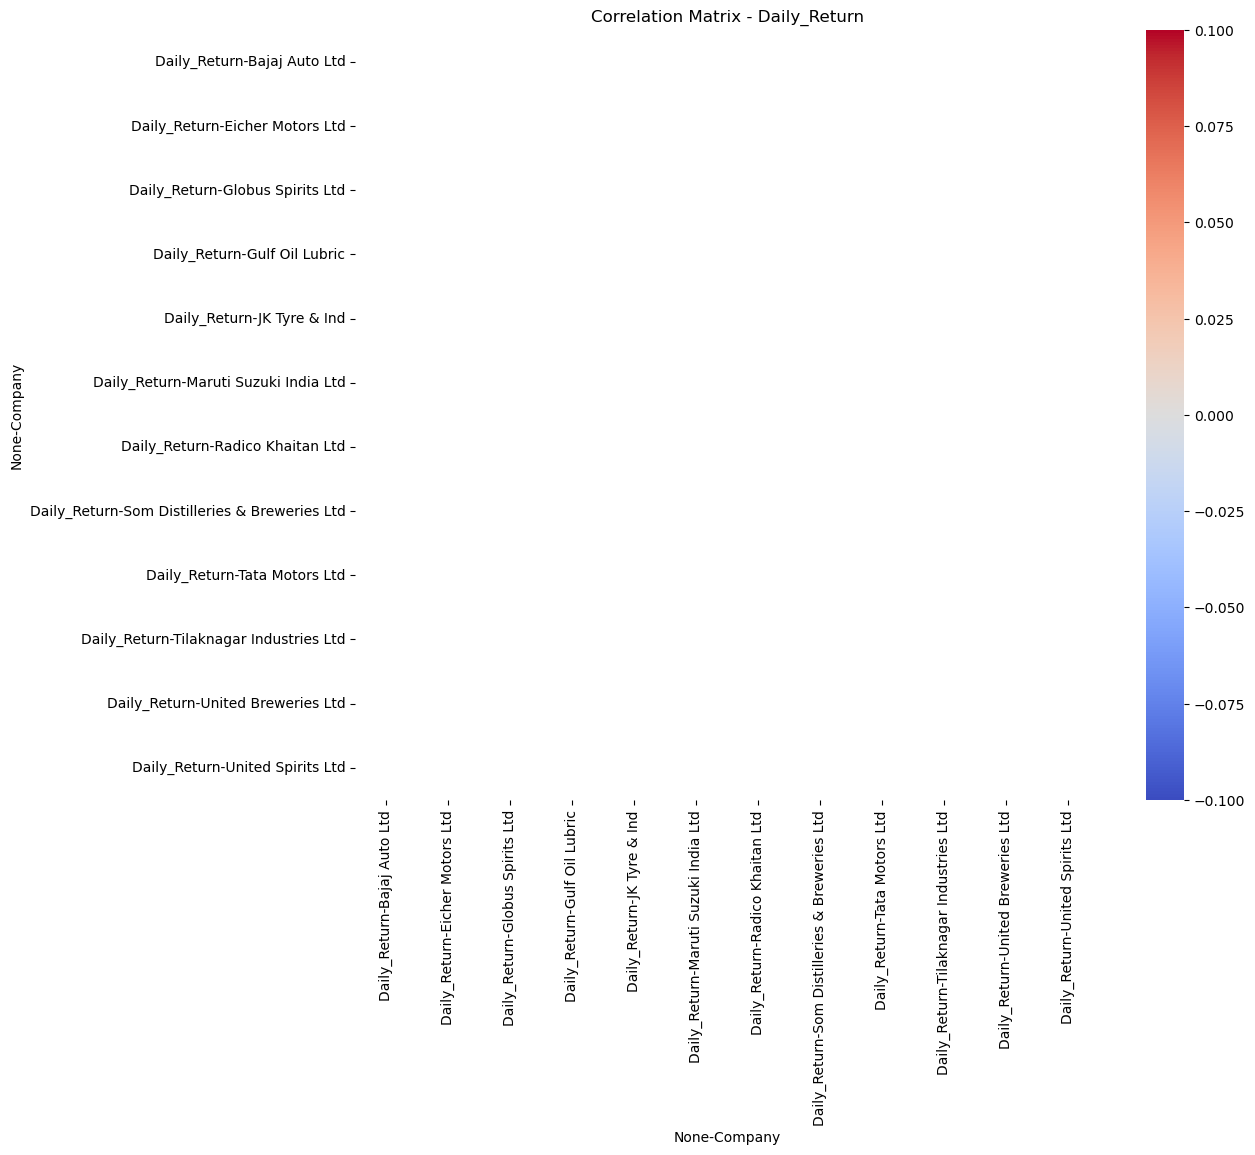

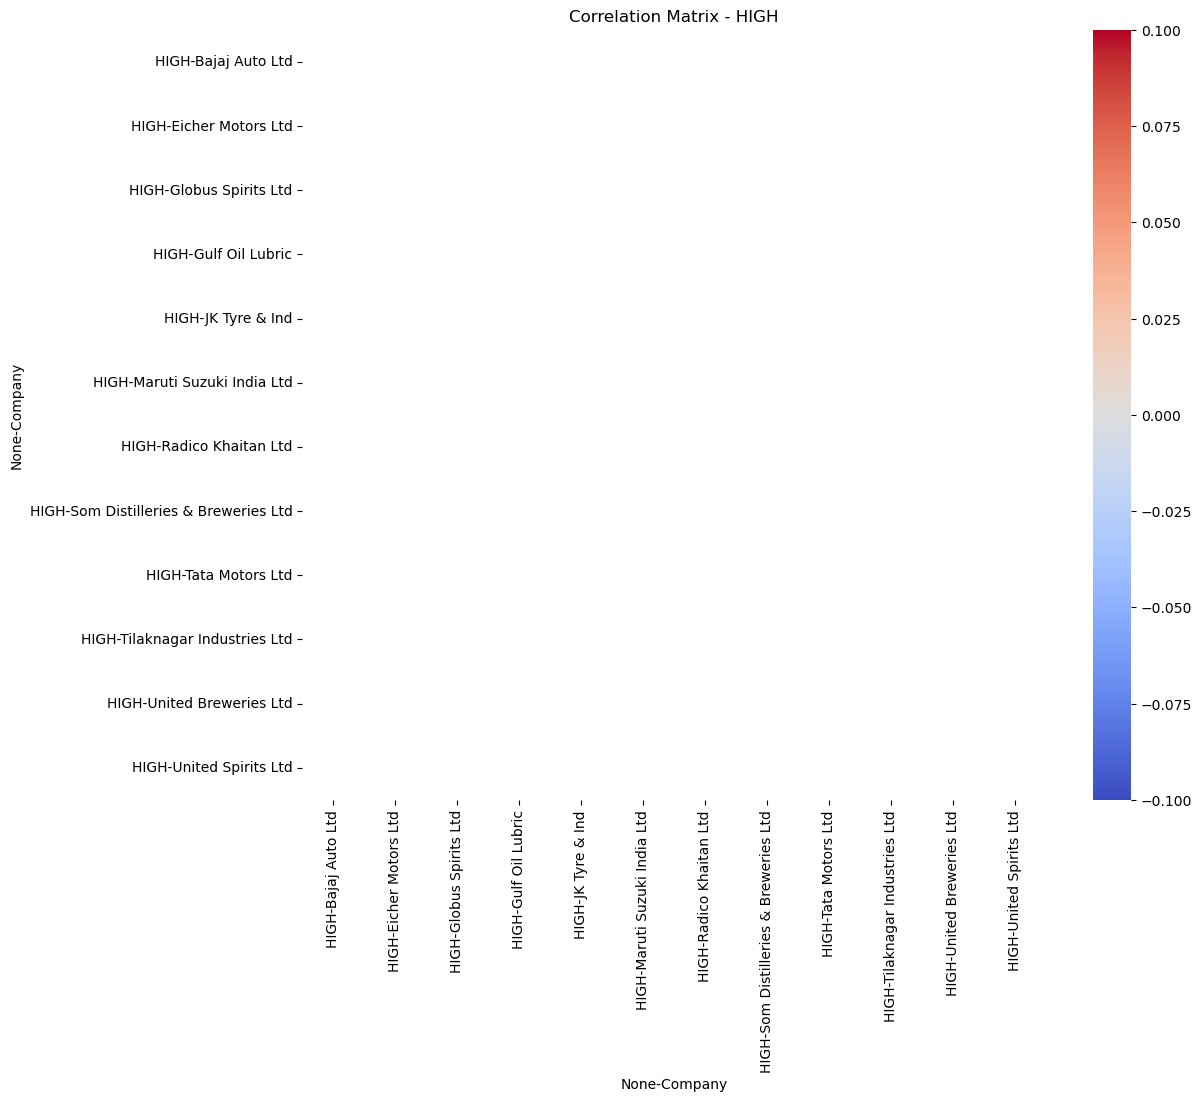

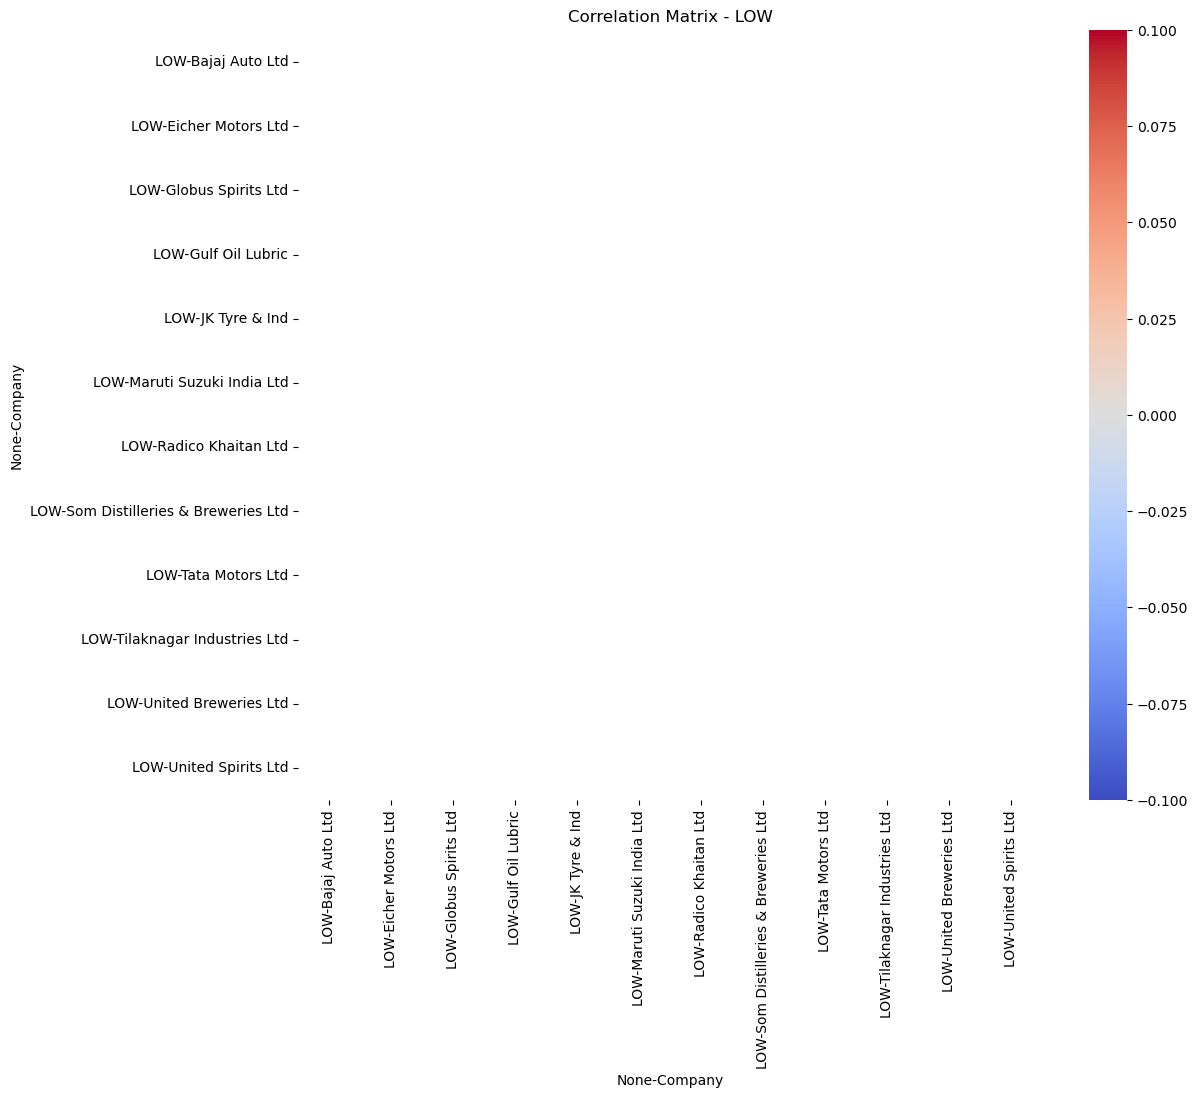

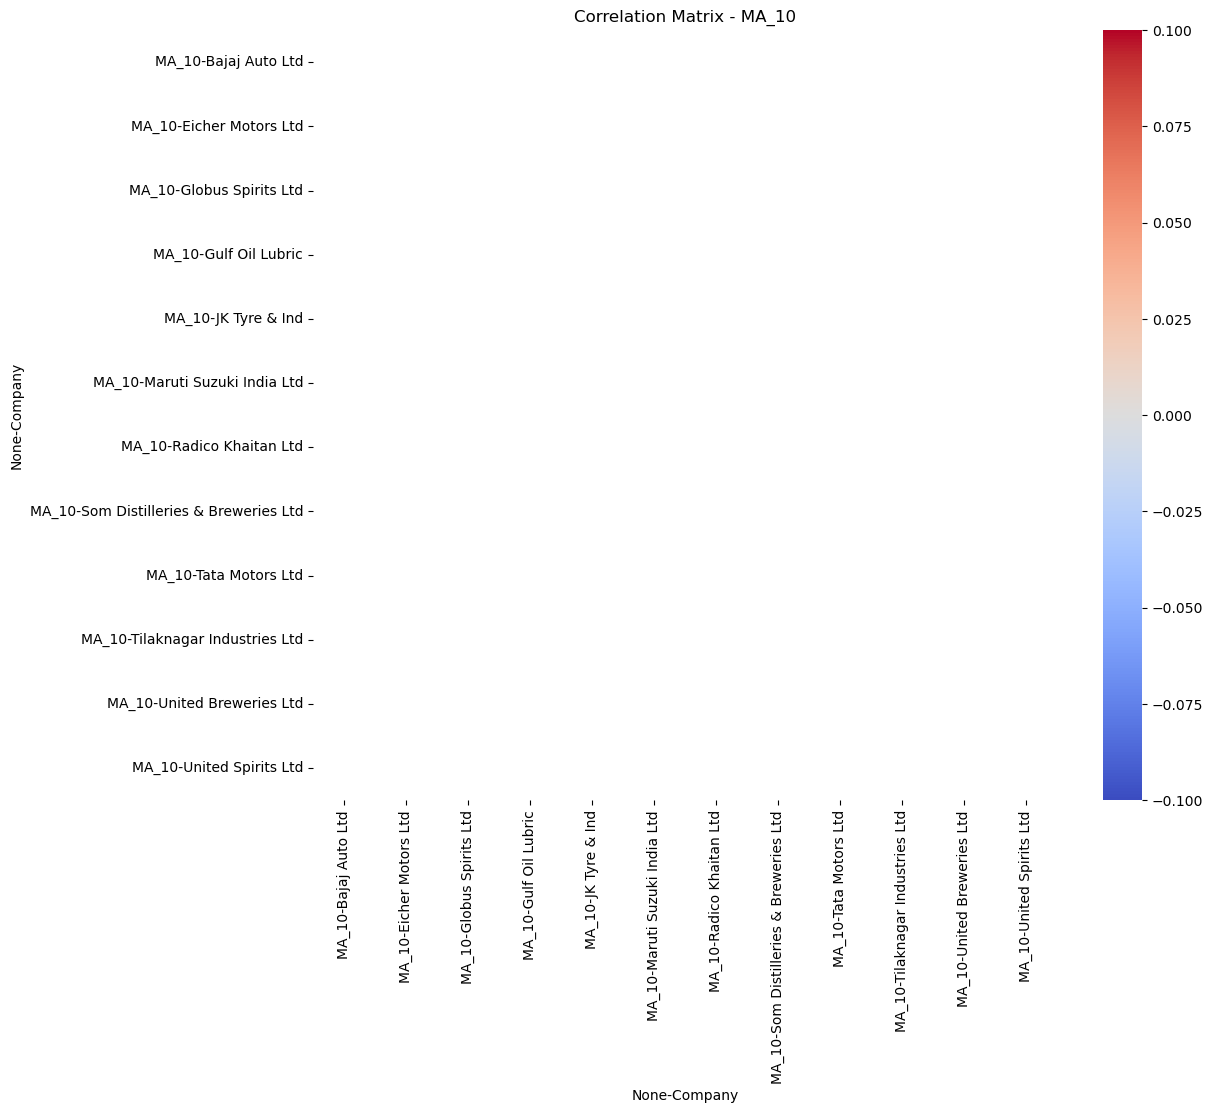

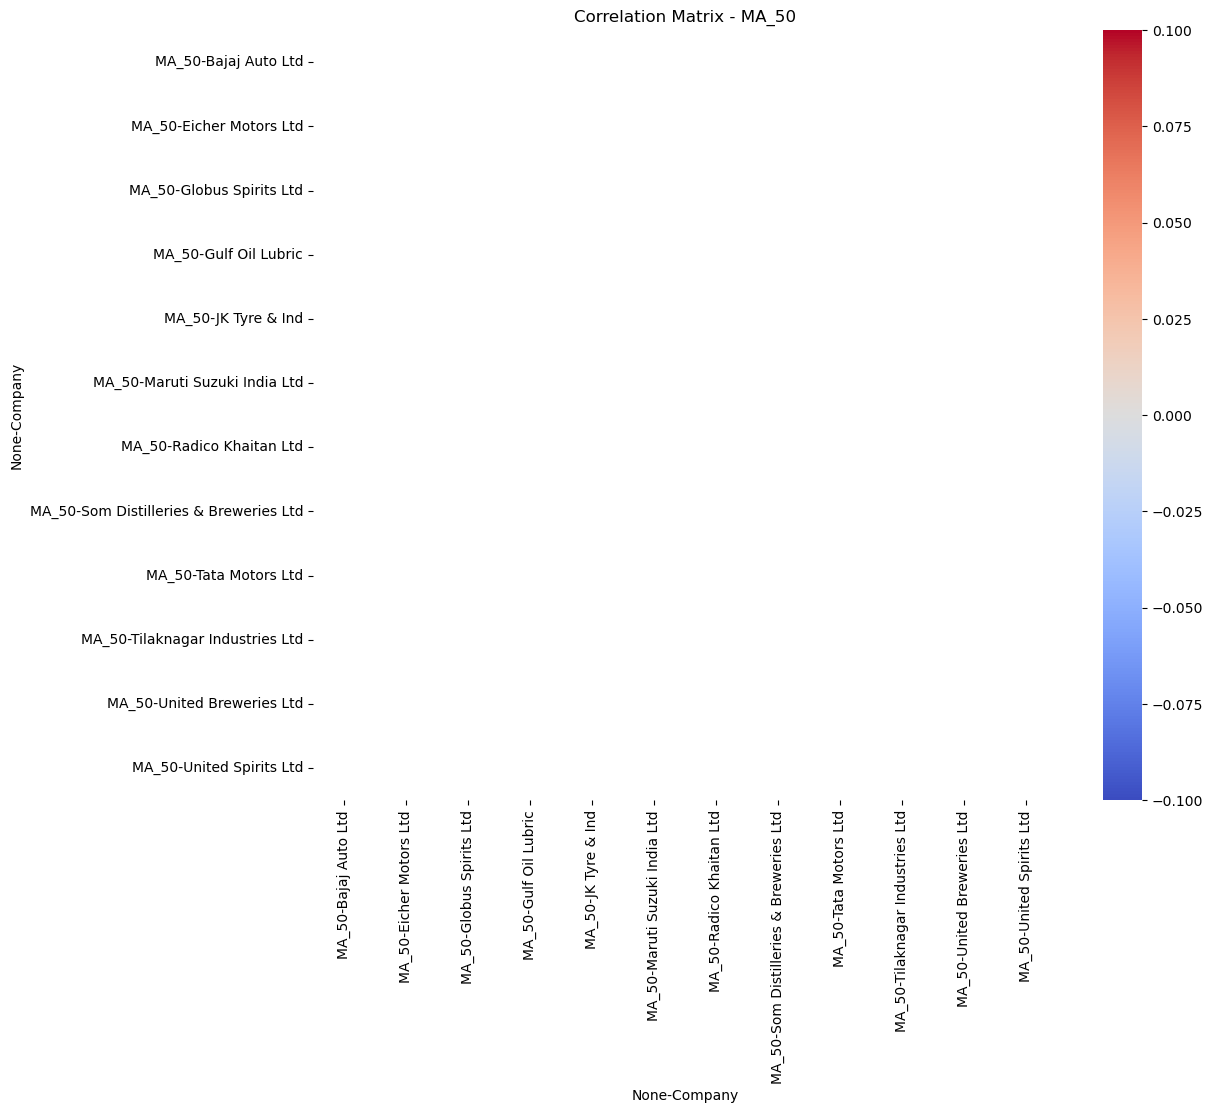

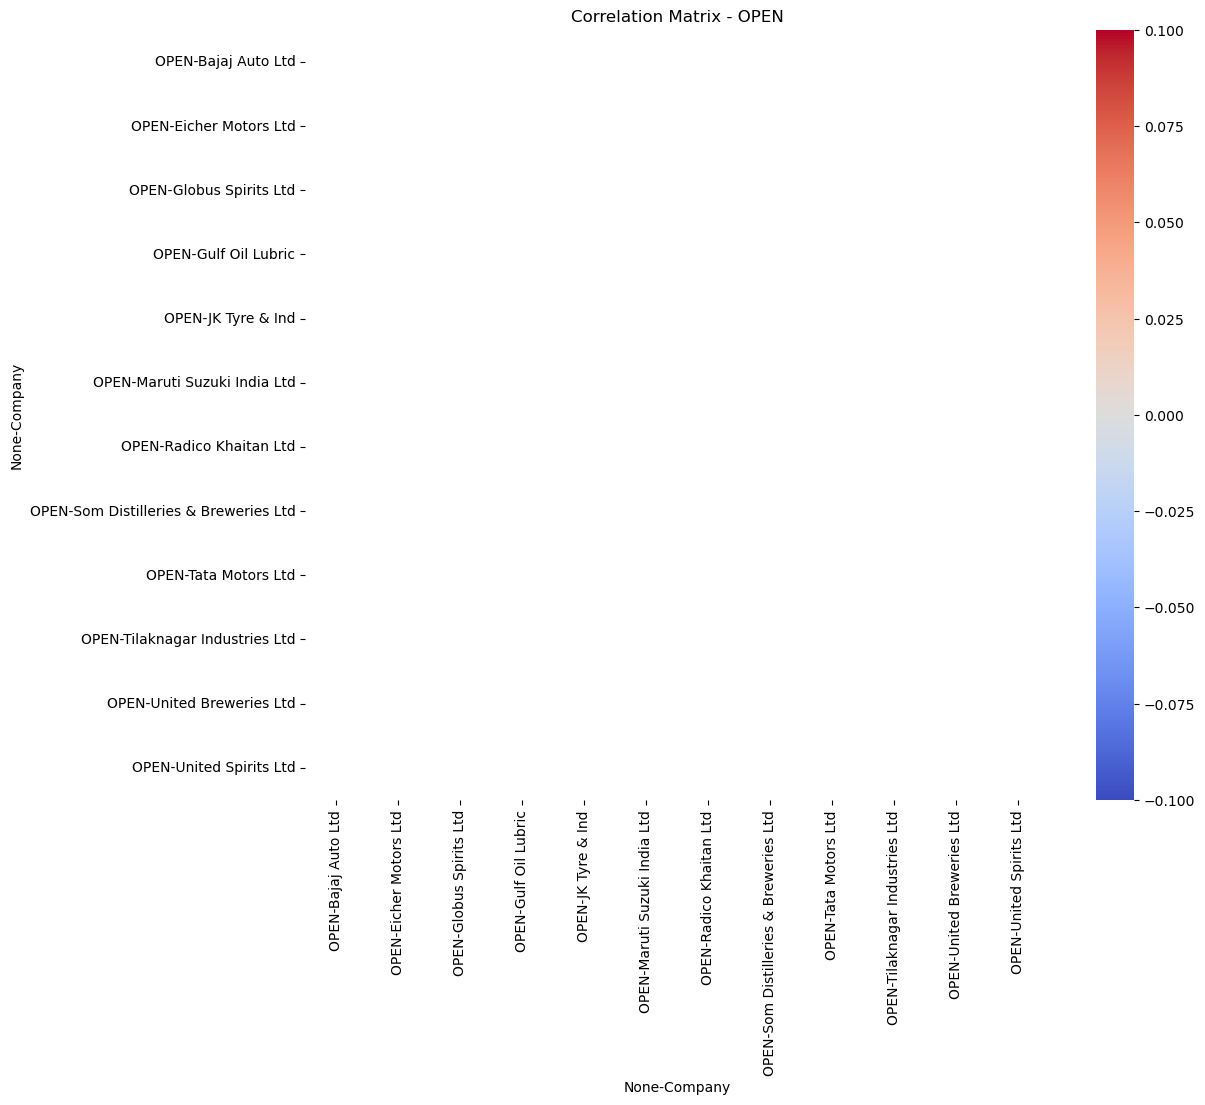

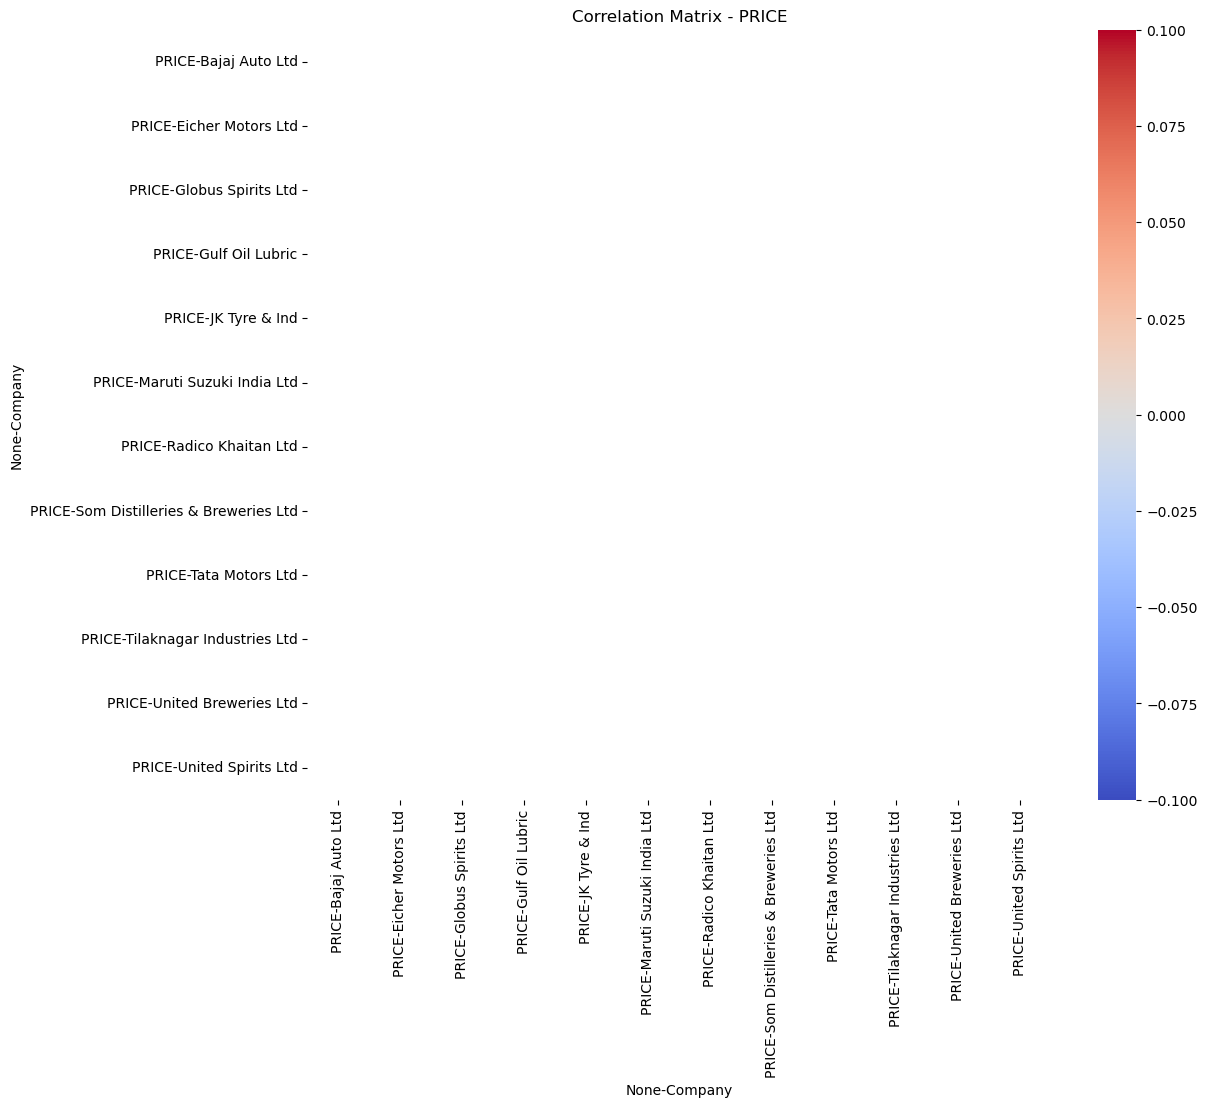

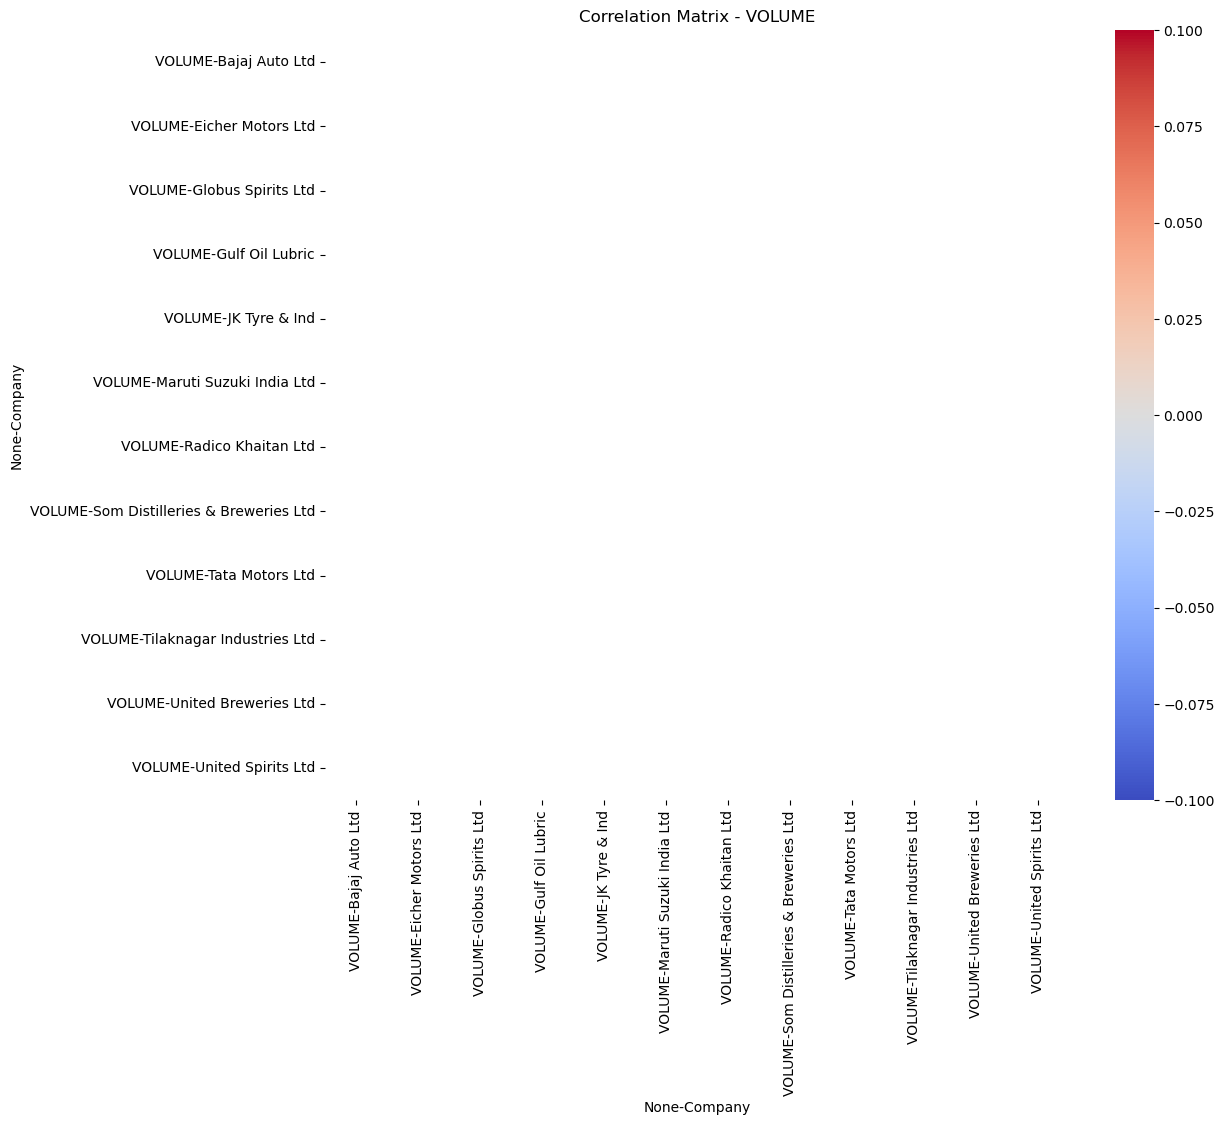

In [28]:

columns_of_interest = ['PRICE', 'OPEN', 'HIGH', 'LOW', 'VOLUME', 'CHANGE(%)', 'Daily_Return', 'MA_10', 'MA_50', 'Category','Company']

# Select relevant columns from the DataFrame
df_subset = df2[columns_of_interest]

# Create a pivot table to separate the data by 'Category'
pivot_table = df_subset.pivot_table(index='Category', columns='Company', values=columns_of_interest[:-1], aggfunc='mean')

# Calculate correlation matrix for each 'Category'
correlation_matrices = {}
for category, data in pivot_table.groupby(level=0, axis=1):
    correlation_matrices[category] = data.corr()

# Plot correlation matrices
for category, matrix in correlation_matrices.items():
    plt.figure(figsize=(12, 10))
    sns.heatmap(matrix, annot=True, cmap='coolwarm', linewidths=.5)
    plt.title(f'Correlation Matrix - {category}')
    plt.show()


In [29]:
# Calculate Cumulative Returns within each category
df2['Cumulative_Return'] = df2.groupby(['Category', 'Company'])['Daily_Return'].cumsum()

# Identify Laggards within Each Category (Bottom 1)
laggards = df2.groupby('Category').apply(lambda x: x.nsmallest(1, 'Cumulative_Return'))

# Display the results
print("Laggards within Each Category:")
print(laggards[['Category', 'Company', 'Cumulative_Return']])

Laggards within Each Category:
                                                Category             Company  \
Category                                                                       
Alcohol                  6027                    Alcohol  Globus Spirits Ltd   
Automobile & Ancillaries 14503  Automobile & Ancillaries       JK Tyre & Ind   

                                Cumulative_Return  
Category                                           
Alcohol                  6027           -0.379807  
Automobile & Ancillaries 14503          -0.811697  


In [30]:
df2

,Category,Company,Industry,DATE,PRICE,OPEN,HIGH,LOW,VOLUME,CHANGE(%),Daily_Return,MA_10,MA_50,Volatility,Cumulative_Return
11106,Automobile & Ancillaries,Bajaj Auto Ltd,Automobile - 2 & 3 Wheelers,2019-01-01,2726.65,2735.00,2743.40,2705.00,304150.0,0.0024,NaN,NaN,NaN,NaN,NaN
11105,Automobile & Ancillaries,Bajaj Auto Ltd,Automobile - 2 & 3 Wheelers,2019-01-02,2692.00,2720.00,2747.25,2677.00,599274.0,-0.0127,-0.012708,NaN,NaN,NaN,-0.012708
11104,Automobile & Ancillaries,Bajaj Auto Ltd,Automobile - 2 & 3 Wheelers,2019-01-03,2701.35,2690.10,2723.85,2682.10,310511.0,0.0035,0.003473,NaN,NaN,NaN,-0.009235
11103,Automobile & Ancillaries,Bajaj Auto Ltd,Automobile - 2 & 3 Wheelers,2019-01-04,2734.20,2714.00,2742.00,2702.10,362393.0,0.0122,0.012161,NaN,NaN,NaN,0.002926
11102,Automobile & Ancillaries,Bajaj Auto Ltd,Automobile - 2 & 3 Wheelers,2019-01-07,2658.55,2739.90,2740.00,2645.00,462215.0,-0.0277,-0.027668,NaN,NaN,NaN,-0.024742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,Alcohol,United Spirits Ltd,Breweries & Distilleries,2023-12-14,1084.80,1083.85,1089.90,1076.55,2077791.0,0.0114,0.011374,972.185,993.423333,0.062647,4.435786
3,Alcohol,United Spirits Ltd,Breweries & Distilleries,2023-12-15,1083.25,1092.00,1095.00,1078.05,1322021.0,-0.0014,-0.001429,1003.895,1004.573333,0.044008,4.434357
2,Alcohol,United Spirits Ltd,Breweries & Distilleries,2023-12-18,1105.15,1079.30,1115.75,1061.30,1780071.0,0.0202,0.020217,1034.855,1014.883333,0.044276,4.454574
1,Alcohol,United Spirits Ltd,Breweries & Distilleries,2023-12-19,1086.25,1111.00,1112.95,1083.05,1062384.0,-0.0171,-0.017102,1055.405,1020.246667,0.038629,4.437473


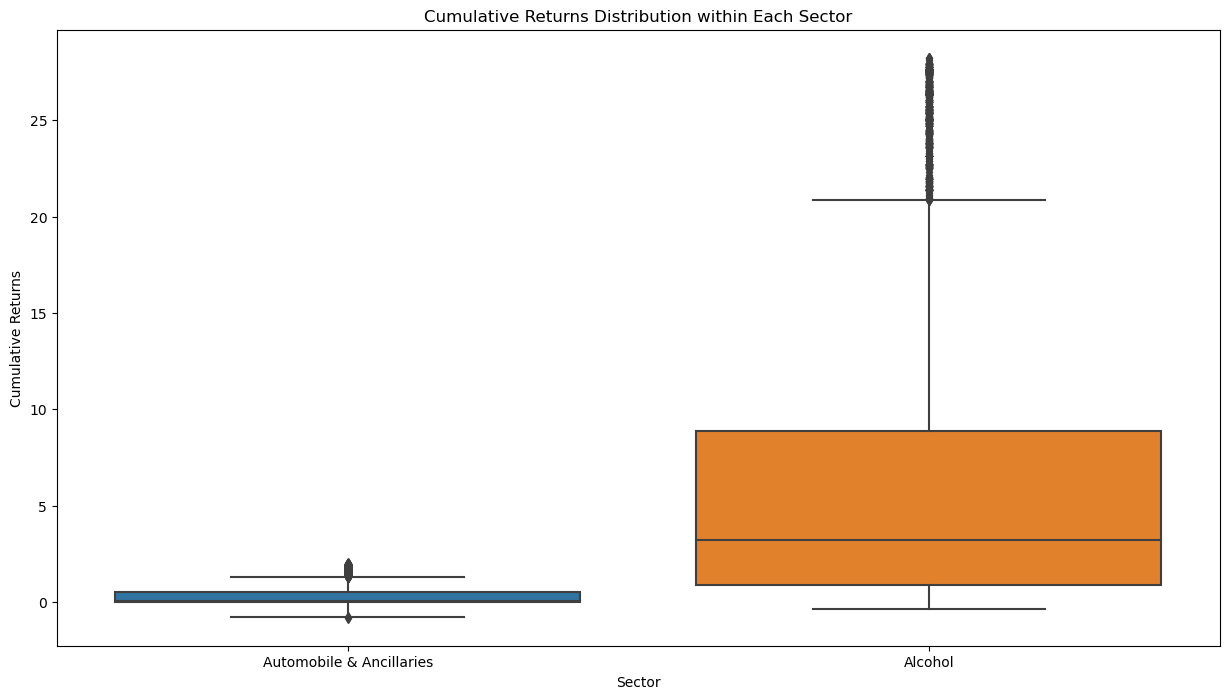

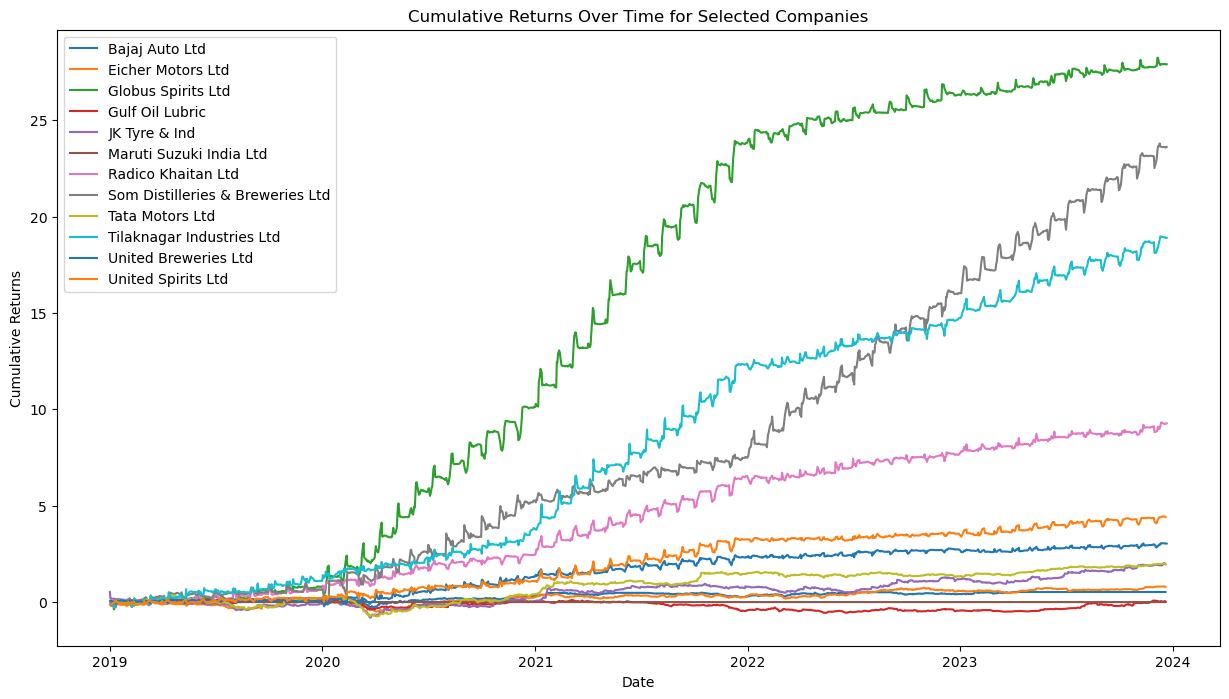

Statistical Summary of Cumulative Returns within Each Sector:


,count,mean,std,min,25%,50%,75%,max
Category,,,,,,,,
Alcohol,7402.0,6.604296,7.671621,-0.379807,0.908844,3.204621,8.886608,28.242837
Automobile & Ancillaries,7392.0,0.288866,0.546655,-0.811697,-0.001372,0.078327,0.523326,2.028911


In [31]:

plt.figure(figsize=(15, 8))
sns.boxplot(x='Category', y='Cumulative_Return', data=df2)
plt.title('Cumulative Returns Distribution within Each Sector')
plt.xlabel('Sector')
plt.ylabel('Cumulative Returns')
plt.show()

# Line chart to compare Cumulative Returns over time for select companies
selected_companies = ['Bajaj Auto Ltd','Eicher Motors Ltd','Globus Spirits Ltd','Gulf Oil Lubric','JK Tyre & Ind','Maruti Suzuki India Ltd','Radico Khaitan Ltd','Som Distilleries & Breweries Ltd','Tata Motors Ltd','Tilaknagar Industries Ltd','United Breweries Ltd','United Spirits Ltd']  # Replace with actual company names
plt.figure(figsize=(15, 8))
for company in selected_companies:
    company_data = df2[df2['Company'] == company]
    plt.plot(company_data['DATE'], company_data['Cumulative_Return'], label=company)

plt.title('Cumulative Returns Over Time for Selected Companies')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()

# Statistical summary to compare mean, median, etc. of Cumulative Returns within each sector
summary_stats = df2.groupby('Category')['Cumulative_Return'].describe()
print("Statistical Summary of Cumulative Returns within Each Sector:")
summary_stats


In [32]:


# Calculate Cumulative Returns within each category
df2['Cumulative_Return'] = df2.groupby(['Category', 'Company'])['Daily_Return'].cumsum()

# Identify Leaders within Each Category (Top 1)
leaders = df2.groupby('Category').apply(lambda x: x.nlargest(1, 'Cumulative_Return'))

# Display the results
print("Leaders within Each Category:")
print(leaders[['Category', 'Company', 'Cumulative_Return']])


Leaders within Each Category:
                                                Category             Company  \
Category                                                                       
Alcohol                  5071                    Alcohol  Globus Spirits Ltd   
Automobile & Ancillaries 13575  Automobile & Ancillaries       JK Tyre & Ind   

                                Cumulative_Return  
Category                                           
Alcohol                  5071           28.242837  
Automobile & Ancillaries 13575           2.028911  


In [33]:
# Calculate Cumulative Returns within each category
df2['Cumulative_Return'] = df2.groupby(['Category', 'Company'])['Daily_Return'].cumsum()

# Identify Laggards within Each Category (Bottom 1)
laggards = df2.groupby('Category').apply(lambda x: x.nsmallest(1, 'Cumulative_Return'))

# Display the results
print("Laggards within Each Category:")
print(laggards[['Category', 'Company', 'Cumulative_Return']])


Laggards within Each Category:
                                                Category             Company  \
Category                                                                       
Alcohol                  6027                    Alcohol  Globus Spirits Ltd   
Automobile & Ancillaries 14503  Automobile & Ancillaries       JK Tyre & Ind   

                                Cumulative_Return  
Category                                           
Alcohol                  6027           -0.379807  
Automobile & Ancillaries 14503          -0.811697  


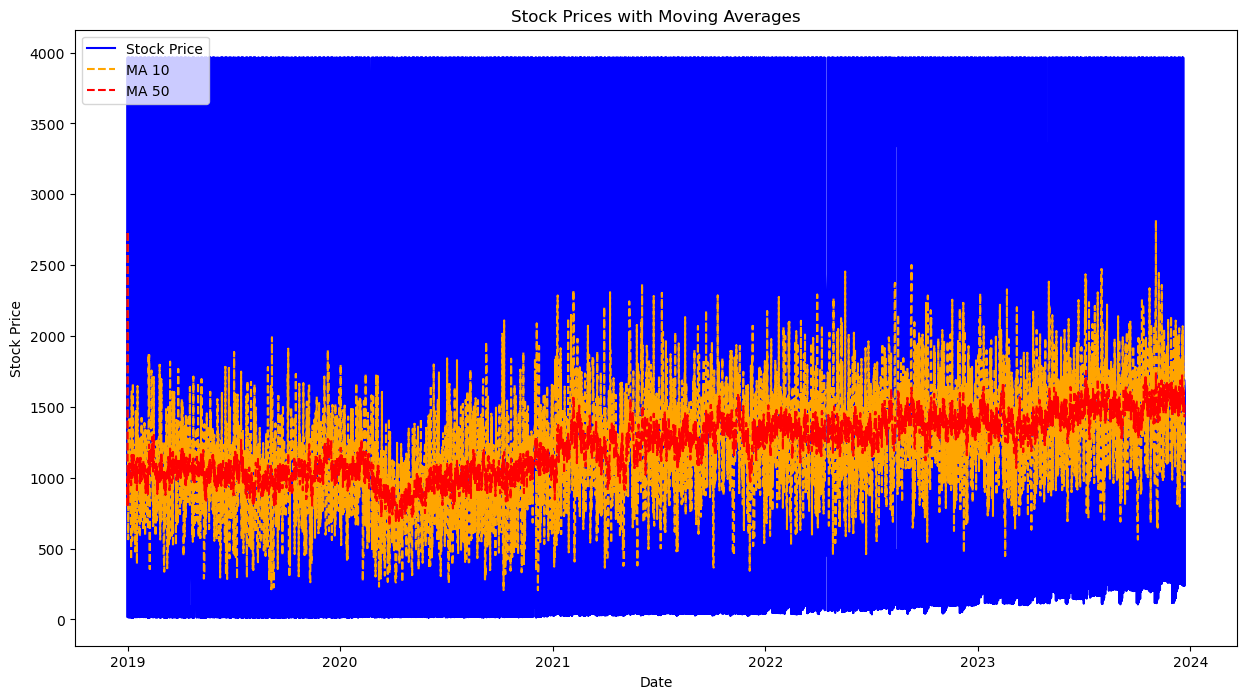

In [34]:

df2['DATE'] = pd.to_datetime(df2['DATE'])
df2 = df2.sort_values(by='DATE')

# Calculate Simple Moving Averages (SMA) for 10 and 50 days
df2['MA_10'] = df2['PRICE'].rolling(window=10, min_periods=1).mean()
df2['MA_50'] = df2['PRICE'].rolling(window=50, min_periods=1).mean()

# Plot the stock prices and moving averages
plt.figure(figsize=(15, 8))
plt.plot(df2['DATE'], df2['PRICE'], label='Stock Price', color='blue')
plt.plot(df2['DATE'], df2['MA_10'], label='MA 10', linestyle='--', color='orange')
plt.plot(df2['DATE'], df2['MA_50'], label='MA 50', linestyle='--', color='red')

plt.title('Stock Prices with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [35]:
df_niftyfifty = pd.read_excel("Final_NSE___Project_dataset (1).xlsx", sheet_name='Nifty 50')
df_niftyfifty 

,Nifty,Date,Price,Open,High,Low,Volume,Chg%
0,Nifty 50,2023-12-20,21150.15,21543.50,21593.00,21087.35,363.89,-0.0141
1,Nifty 50,2023-12-19,21453.10,21477.65,21505.05,21337.75,249.75,0.0016
2,Nifty 50,2023-12-18,21418.65,21434.80,21482.80,21365.35,249.67,-0.0018
3,Nifty 50,2023-12-15,21456.65,21287.45,21492.30,21235.30,508.76,0.0129
4,Nifty 50,2023-12-14,21182.70,21110.40,21210.90,21074.45,334.41,0.0123
...,...,...,...,...,...,...,...,...
1228,Nifty 50,2019-01-07,10771.80,10804.85,10835.95,10750.15,269.37,0.0041
1229,Nifty 50,2019-01-04,10727.35,10699.70,10741.05,10628.65,296.60,0.0052
1230,Nifty 50,2019-01-03,10672.25,10796.80,10814.05,10661.25,286.24,-0.0111
1231,Nifty 50,2019-01-02,10792.50,10868.85,10895.35,10735.05,309.67,-0.0108


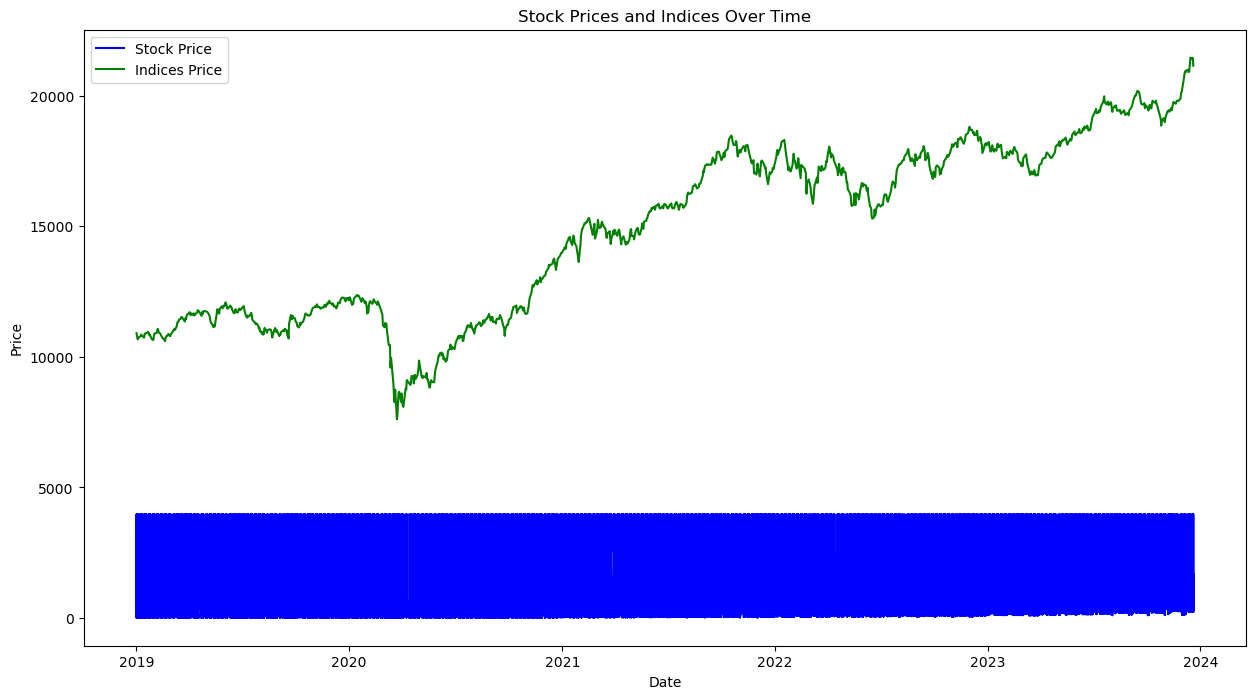

In [36]:

df2['DATE'] = pd.to_datetime(df2['DATE'])
df_niftyfifty['DATE'] = pd.to_datetime(df_niftyfifty['Date'])

# Merge the two DataFrames based on the 'DATE' column
merged_df = pd.merge(df2, df_niftyfifty, on='DATE', how='inner', suffixes=('_stock', '_indices'))

# Plot stock prices and indices over time
plt.figure(figsize=(15, 8))
plt.plot(merged_df['DATE'], merged_df['PRICE'], label='Stock Price', color='blue')
plt.plot(merged_df['DATE'], merged_df['Price'], label='Indices Price', color='green')

plt.title('Stock Prices and Indices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


Company
Bajaj Auto Ltd                      0.015552
Eicher Motors Ltd                   0.020927
Globus Spirits Ltd                  0.213220
Gulf Oil Lubric                     0.019488
JK Tyre & Ind                       0.034455
Maruti Suzuki India Ltd             0.000000
Radico Khaitan Ltd                  0.109719
Som Distilleries & Breweries Ltd    0.192561
Tata Motors Ltd                     0.030152
Tilaknagar Industries Ltd           0.162726
United Breweries Ltd                0.067568
United Spirits Ltd                  0.078405
Name: Daily_Return, dtype: float64


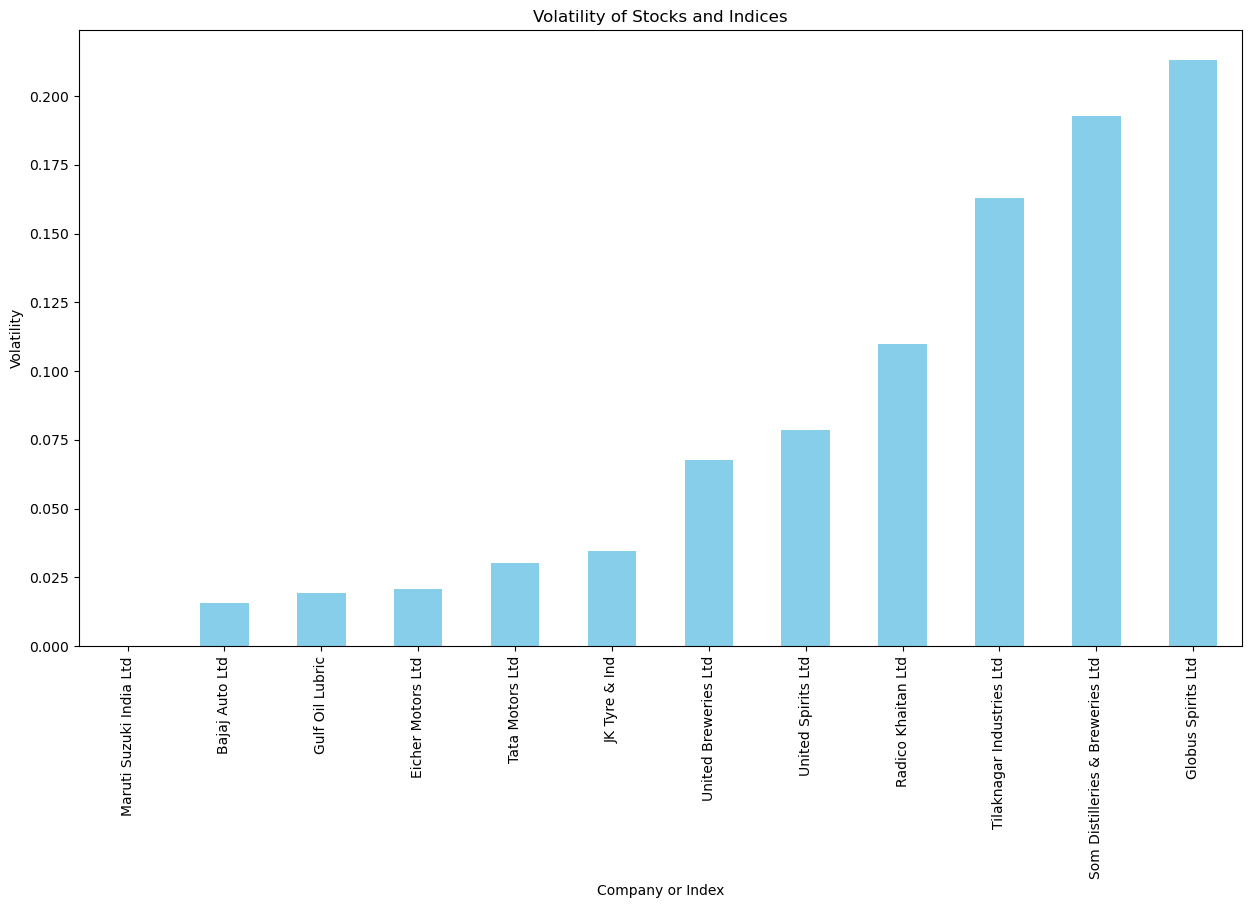

In [37]:

df2['DATE'] = pd.to_datetime(df2['DATE'])

# Calculate daily returns
df2['Daily_Return'] = df2.groupby('Company')['PRICE'].pct_change()

# Calculate volatility (standard deviation of daily returns)
volatility_df = df2.groupby('Company')['Daily_Return'].std()

# Analyze volatility
print(volatility_df)

# Plot volatility
plt.figure(figsize=(15, 8))
volatility_df.sort_values().plot(kind='bar', color='skyblue')
plt.title('Volatility of Stocks and Indices')
plt.xlabel('Company or Index')
plt.ylabel('Volatility')
plt.show()


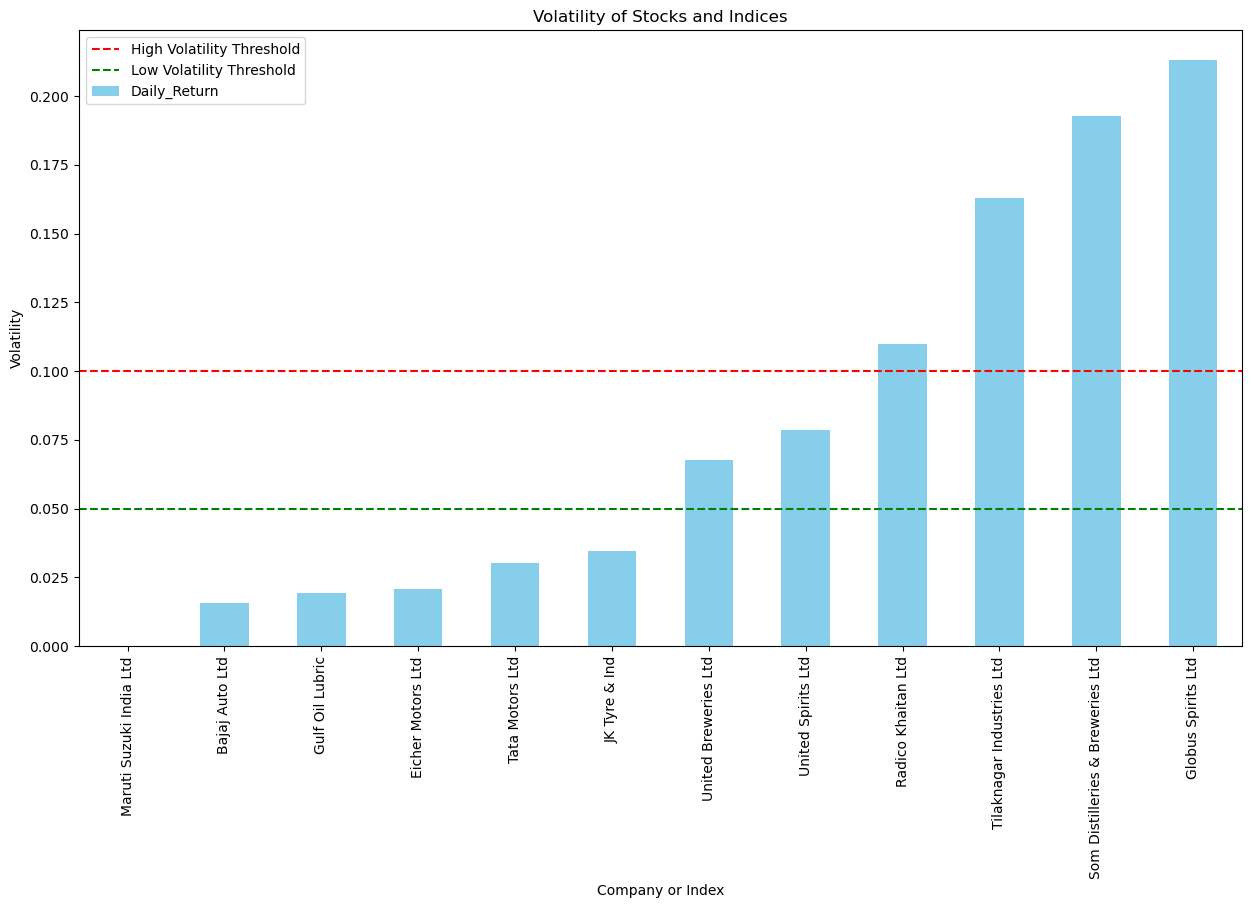

High Volatility Periods: Index(['Globus Spirits Ltd', 'Radico Khaitan Ltd',
       'Som Distilleries & Breweries Ltd', 'Tilaknagar Industries Ltd'],
      dtype='object', name='Company')
Low Volatility Periods: Index(['Bajaj Auto Ltd', 'Eicher Motors Ltd', 'Gulf Oil Lubric',
       'JK Tyre & Ind', 'Maruti Suzuki India Ltd', 'Tata Motors Ltd'],
      dtype='object', name='Company')


In [38]:

df2['DATE'] = pd.to_datetime(df2['DATE'])

# Calculate daily returns
df2['Daily_Return'] = df2.groupby('Company')['PRICE'].pct_change()

# Calculate volatility (standard deviation of daily returns)
volatility_df = df2.groupby('Company')['Daily_Return'].std()

# Set thresholds for high and low volatility
high_volatility_threshold = 0.1  # Adjust the threshold based on your data
low_volatility_threshold = 0.05  # Adjust the threshold based on your data

# Identify periods of high and low volatility
high_volatility_periods = volatility_df[volatility_df > high_volatility_threshold].index
low_volatility_periods = volatility_df[volatility_df < low_volatility_threshold].index

# Plot volatility
plt.figure(figsize=(15, 8))
volatility_df.sort_values().plot(kind='bar', color='skyblue')
plt.title('Volatility of Stocks and Indices')
plt.xlabel('Company or Index')
plt.ylabel('Volatility')

# Highlight high and low volatility periods
plt.axhline(y=high_volatility_threshold, color='red', linestyle='--', label='High Volatility Threshold')
plt.axhline(y=low_volatility_threshold, color='green', linestyle='--', label='Low Volatility Threshold')

plt.legend()
plt.show()

# Print periods of high and low volatility
print(f'High Volatility Periods: {high_volatility_periods}')
print(f'Low Volatility Periods: {low_volatility_periods}')
